Wasp 121. There is a lot of archival data (transit obs) but it may be quite bad. We have G140L data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/'
x1ds = np.hstack((glob.glob('{}*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97050_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98050_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m99010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m99030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/was

(1e-17, 1.748718222312521e-12)

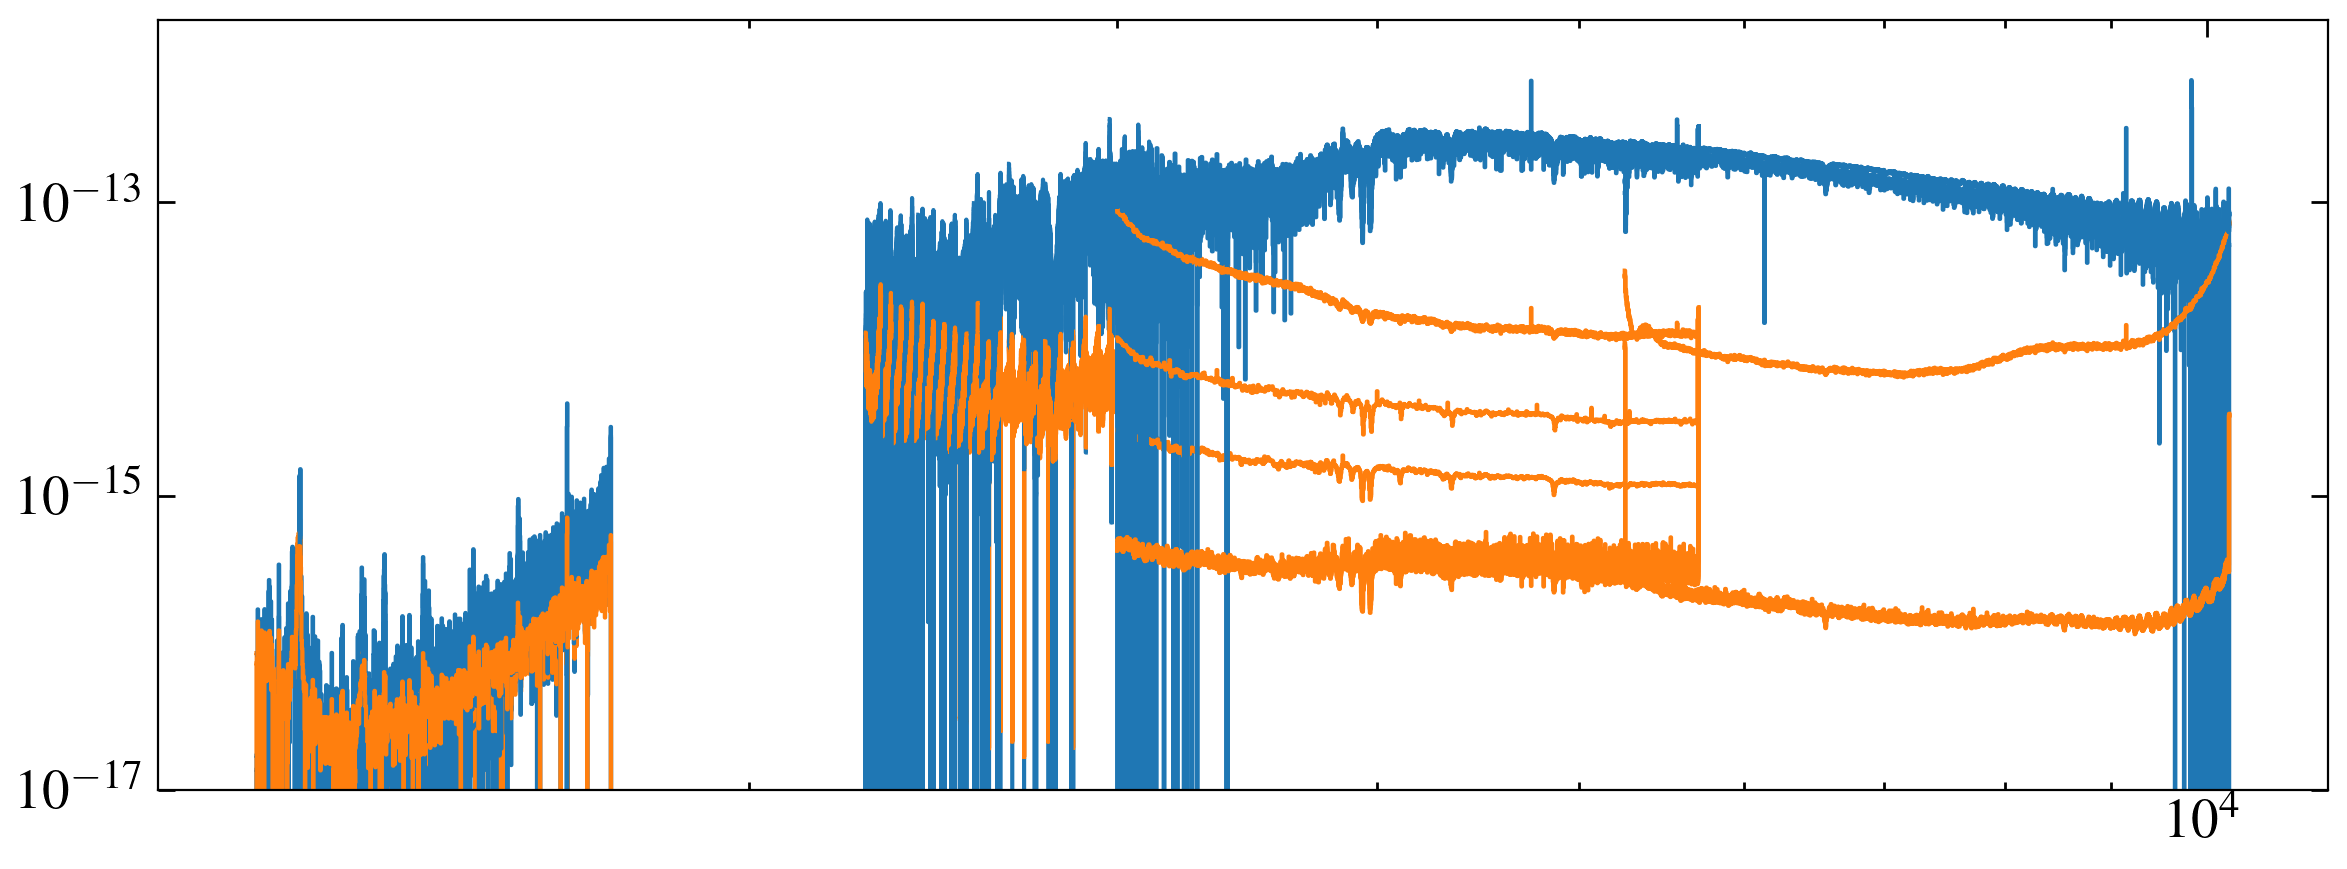

In [3]:
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    for dt in data:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        if grating == 'G430L':
            mask = w > 3000
        else:
            mask = w > 1160
        
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', c='C0')
        plt.step(w, e, where='mid', c='C1')
    # plt.show()

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-17)

G140l first, then see what we can build out of the archival spectra

In [4]:
g140l = []
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G140L':
        g140l.append(x)
    # print(fits.getheader(x, 0)['OPT_ELEM'])

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32010_x1d.fits
[96.89902]


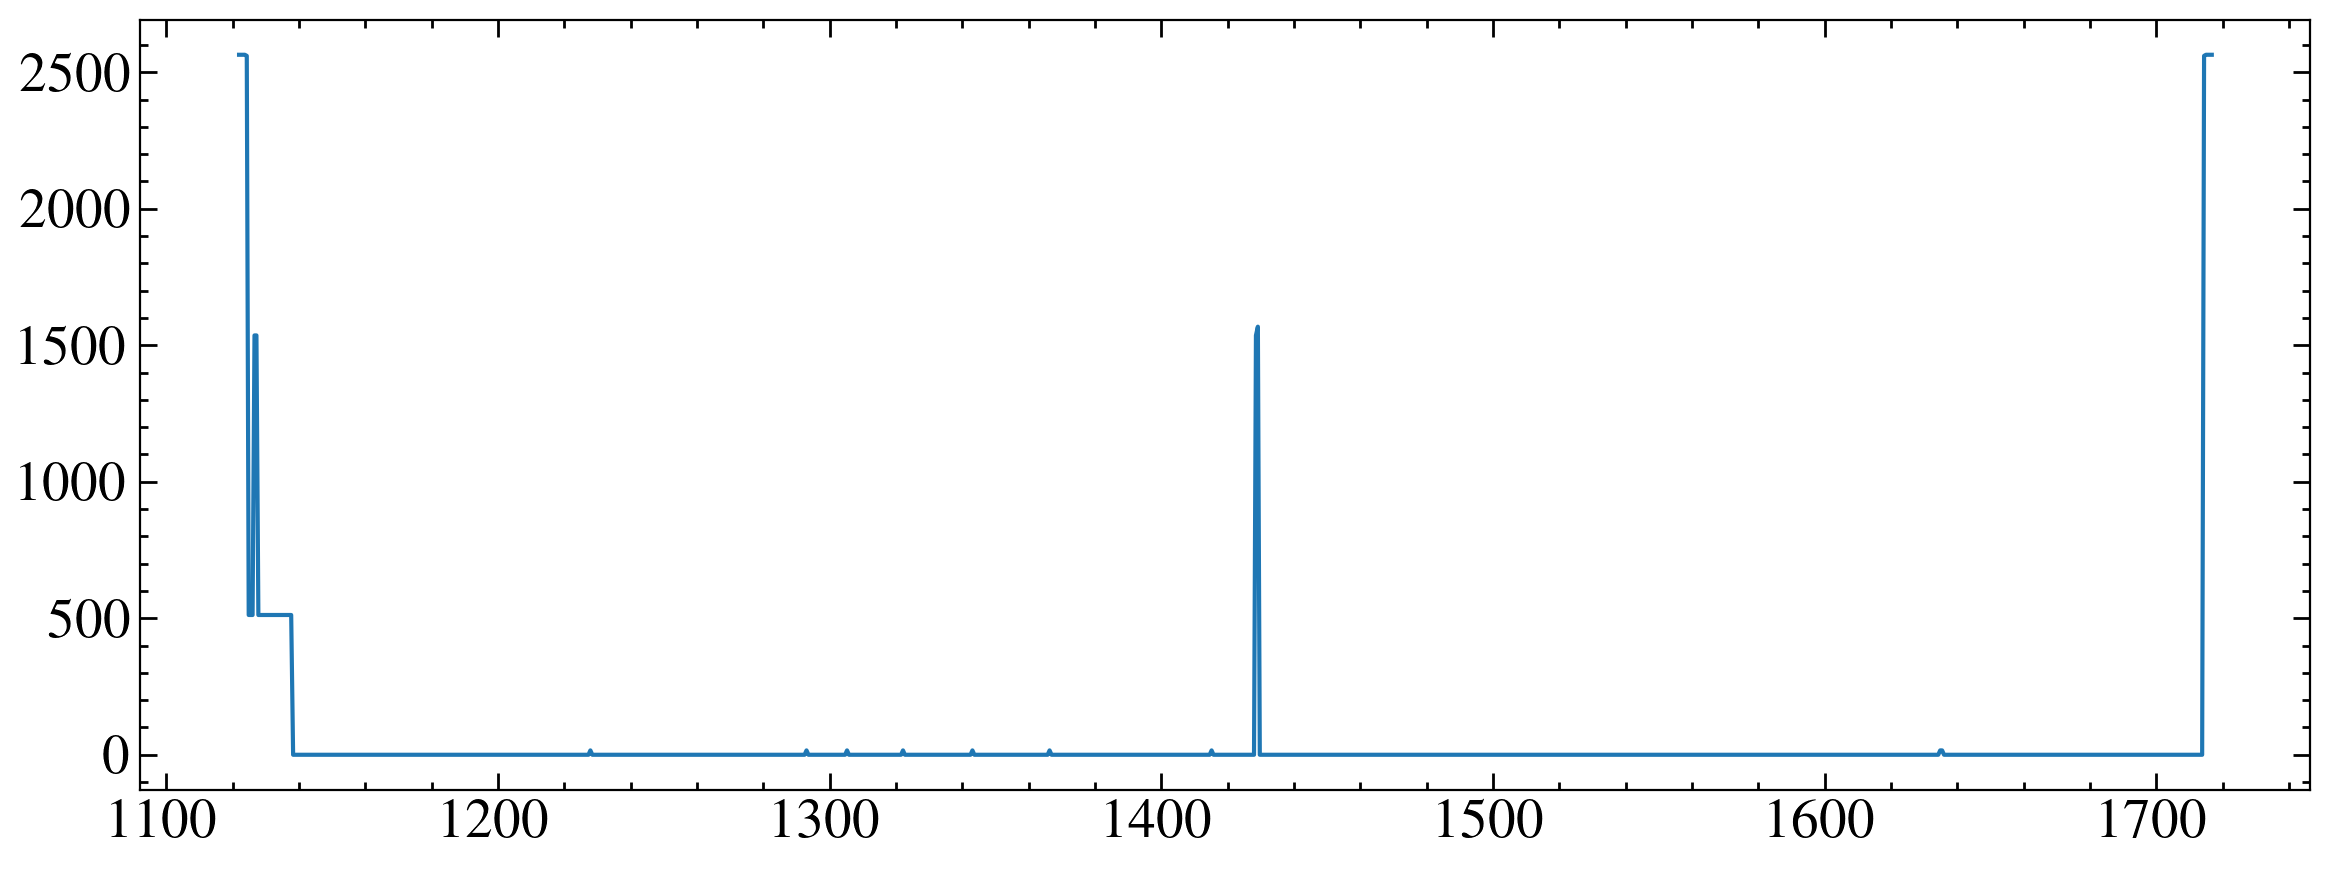

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32020_x1d.fits
[97.24248]


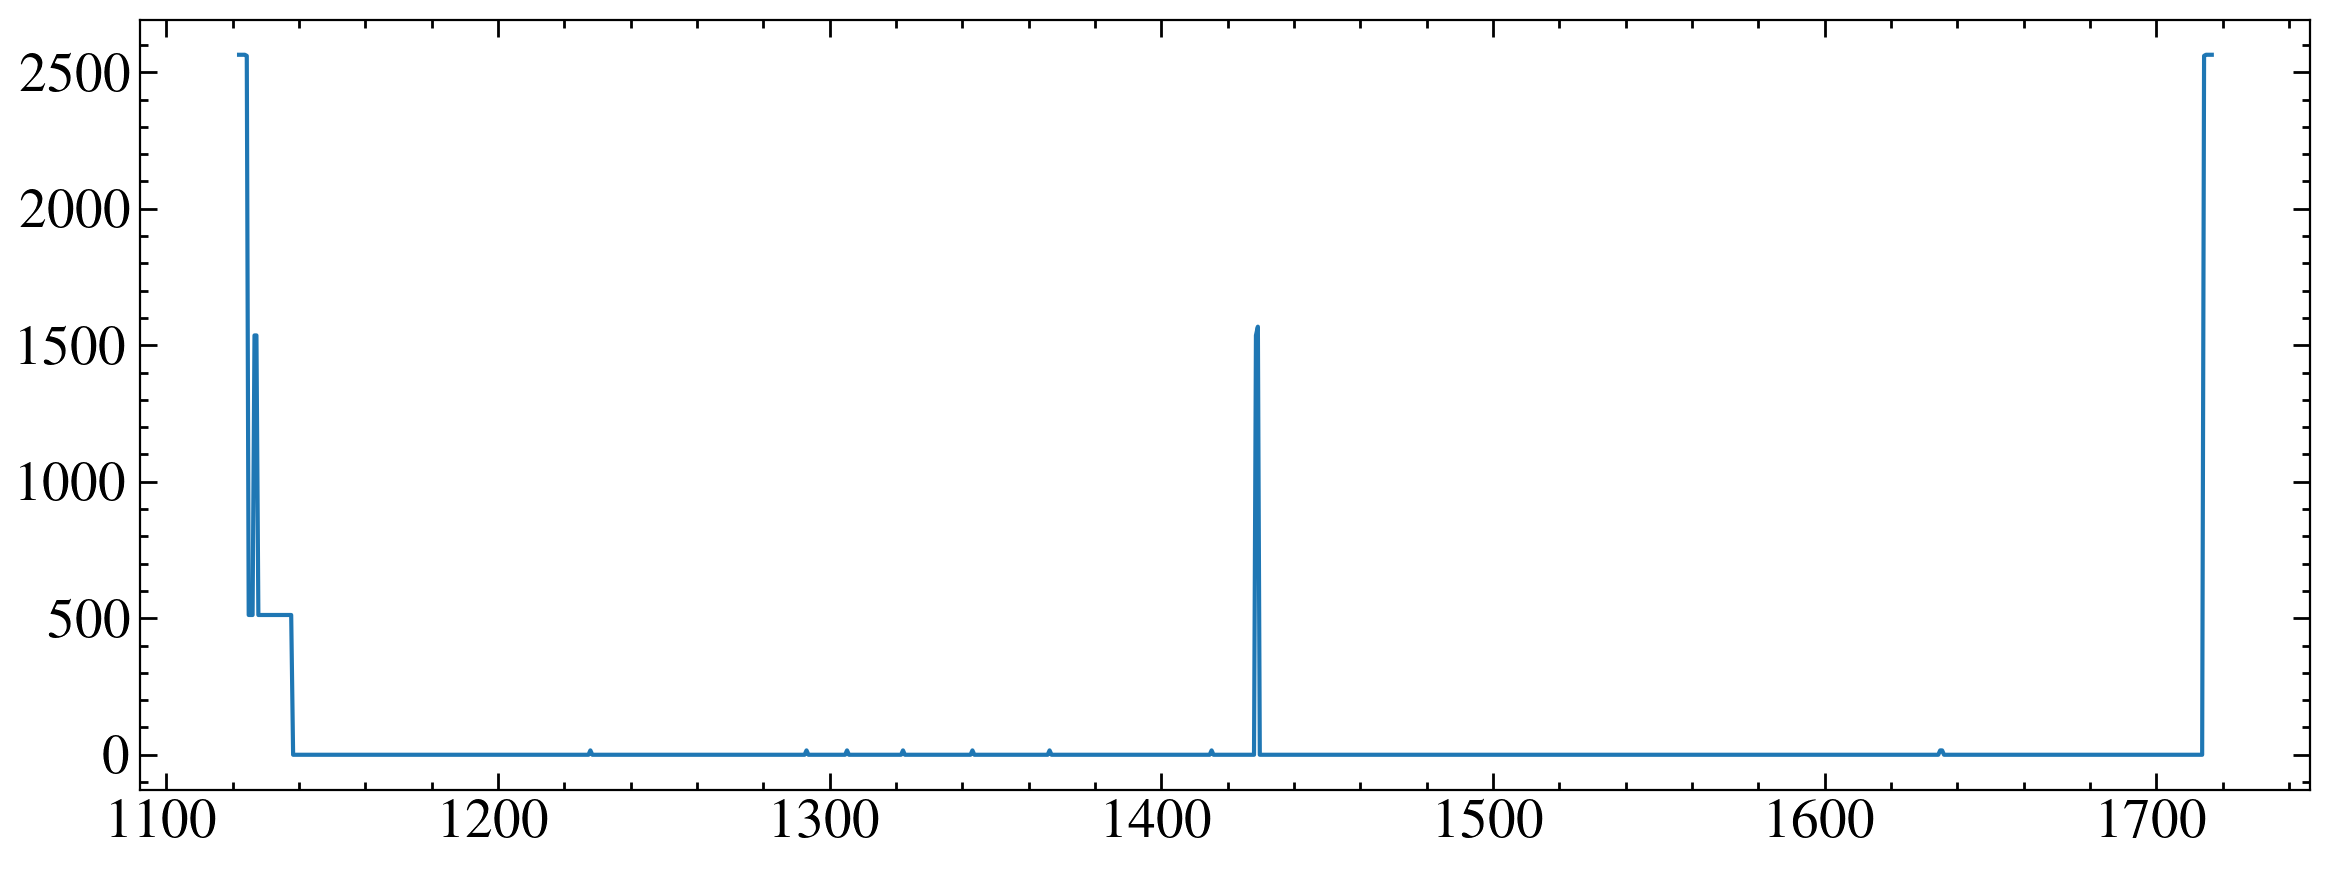

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32030_x1d.fits
[97.10264]


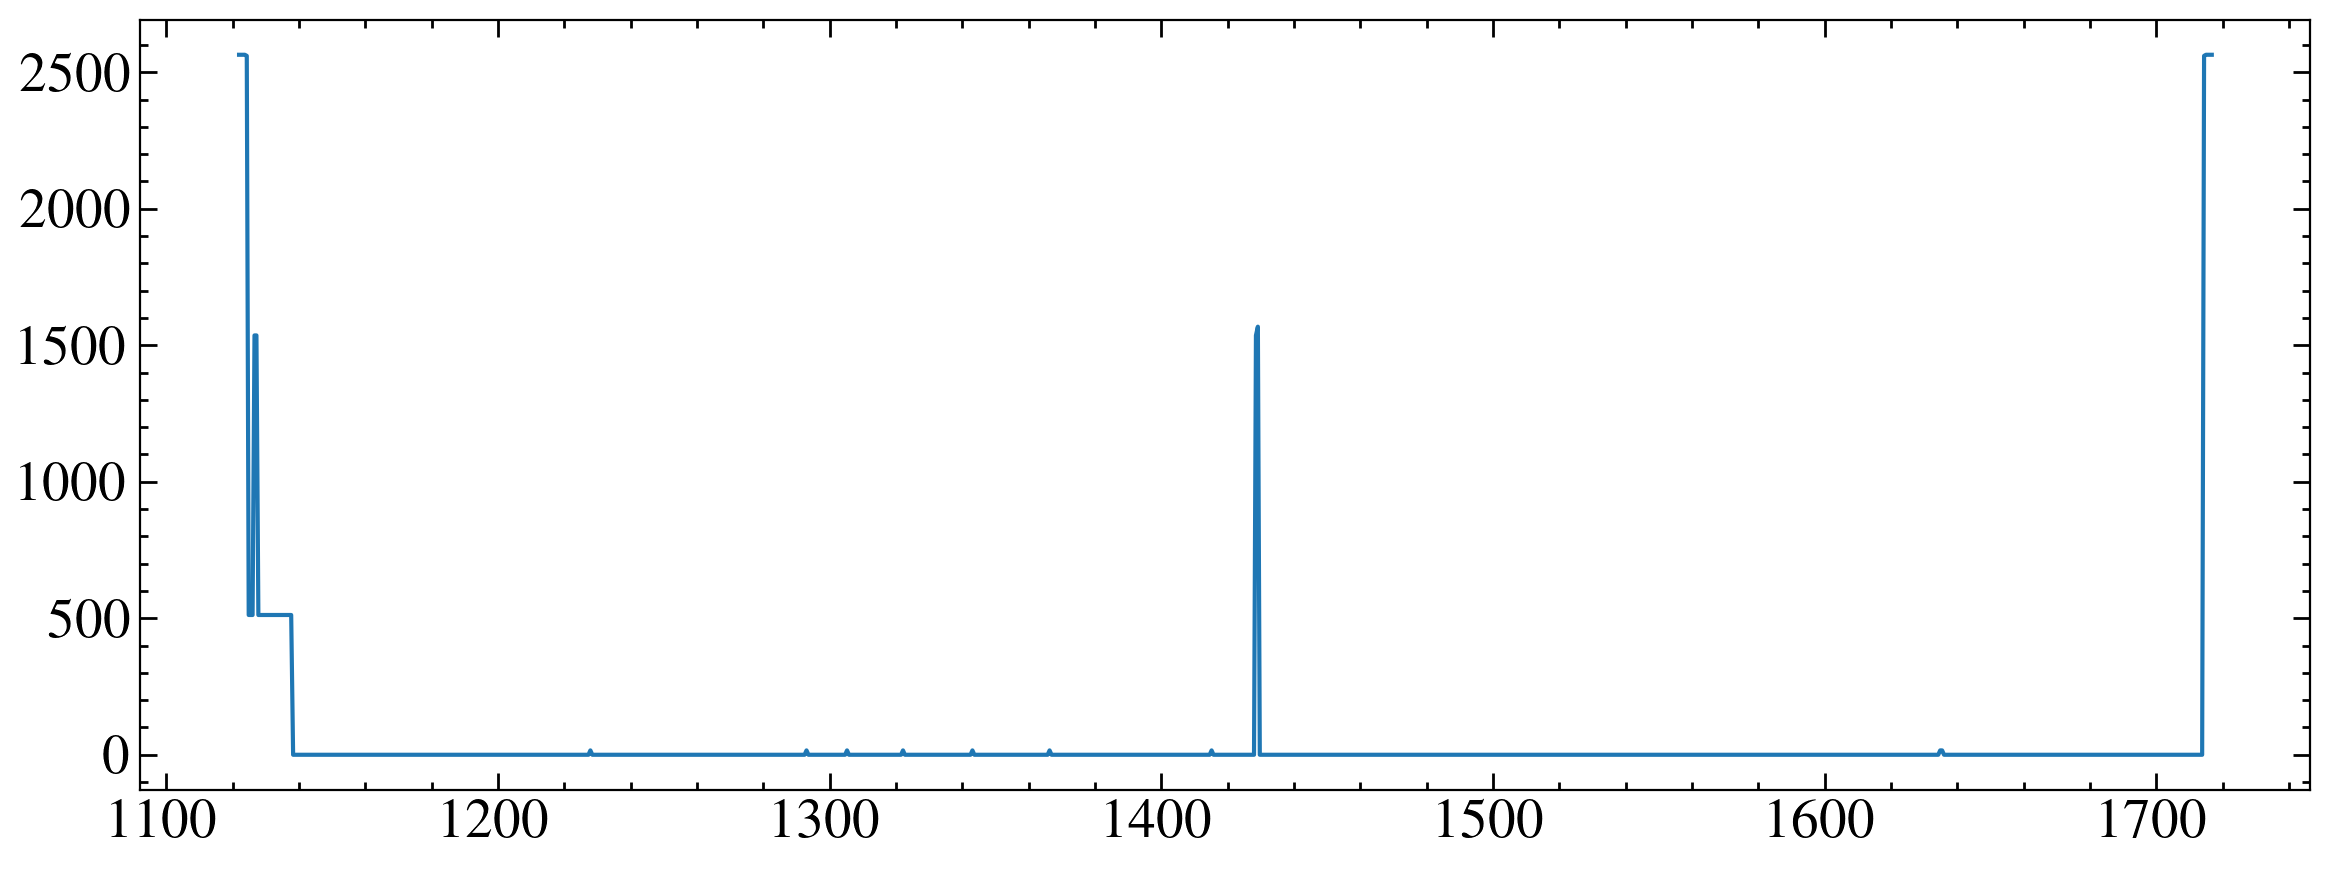

In [5]:
for x in g140l:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    for dt in data:
        w, f, e, dq= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR'], dt['DQ']
        if grating == 'G430L':
            mask = w > 3000 
        else:
            mask = (w > 1160) & (dq ==0)
        
        # w, f, e = w[mask], f[mask], e[mask]
        # plt.step(w, f, where='mid', c='C0')
        # plt.step(w, e, where='mid', c='C1')
        plt.plot(w, dq)
    plt.show()

# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1e-17)

/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/astropy/stats/funcs.py:702: RuntimeWarning: invalid value encountered in sqrt
  [n + 0.5 - np.sqrt(n + 0.25), n + 0.5 + np.sqrt(n + 0.25)]
/home/david/work/meats/SEDs/prepare_stis.py:36: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


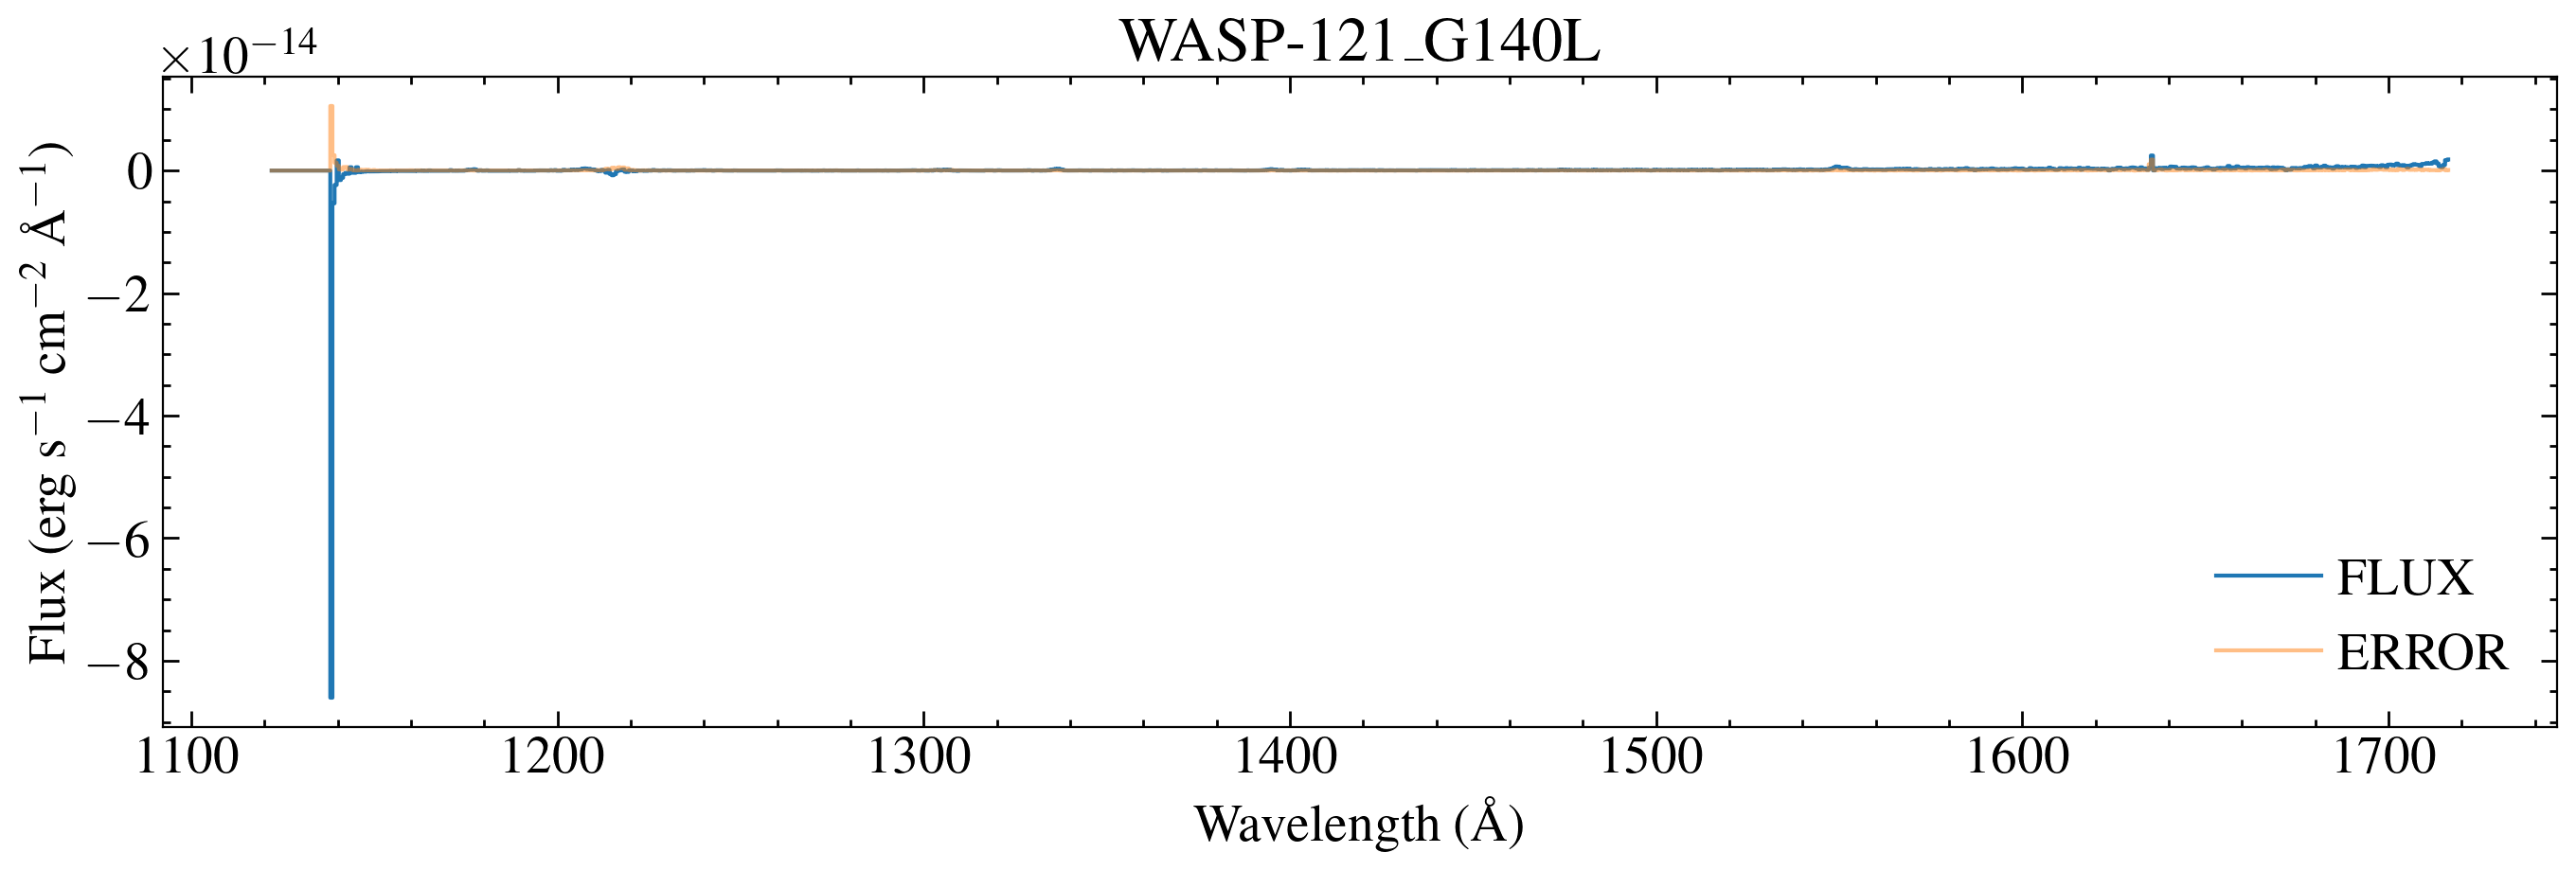

Spectrum saved as hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


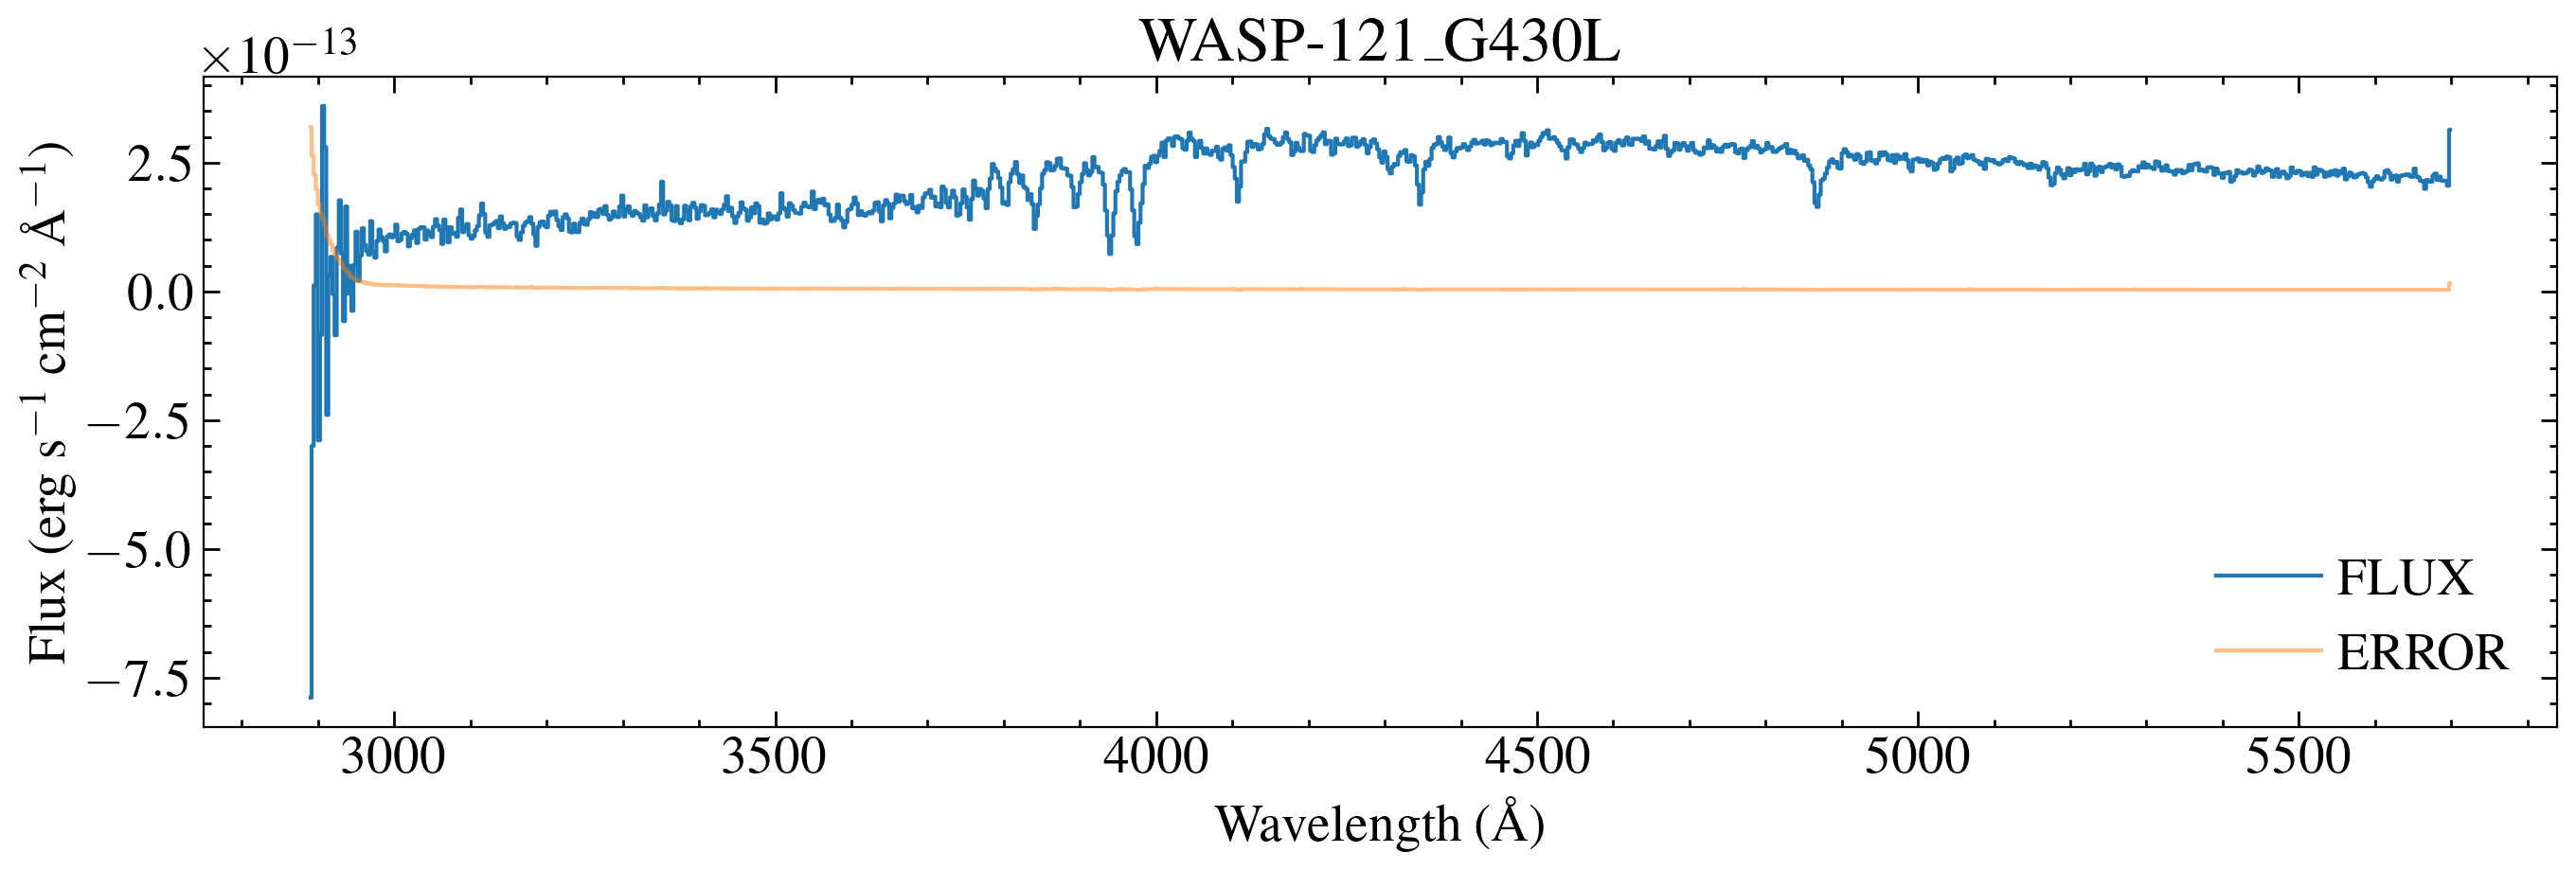

Spectrum saved as hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits


In [6]:
import importlib
import prepare_stis
importlib.reload(prepare_stis)
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/use_x1ds/'
savepath = 'draft_hlsp/wasp-121/'
hlsp = 'meats_hlsp_info.csv'
version = 1
prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'WASP-121')

In [7]:
g430l = glob.glob('{}oeoo*sx1.fits'.format(path))
# for x in g430l:
#     print(x)
#     grating = fits.getheader(x, 0)['OPT_ELEM'] 
#     # print(fits.getheader(x, 0)['OPT_ELEM'])
#     data = fits.getdata(x, 1)
#     print(data['A2Center'])
#     # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
#     for dt in data:
#         w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
#         if grating == 'G430L':
#             mask = w > 3000
#         else:
#             mask = w > 1160
        
#         w, f, e = w[mask], f[mask], e[mask]
#         plt.step(w, f, where='mid', c='C0')
#         plt.step(w, e, where='mid', c='C1')
#     plt.show()


In [8]:
hlsp = glob.glob('draft_hlsp/wasp-121/*')
hlsp

['draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits']

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


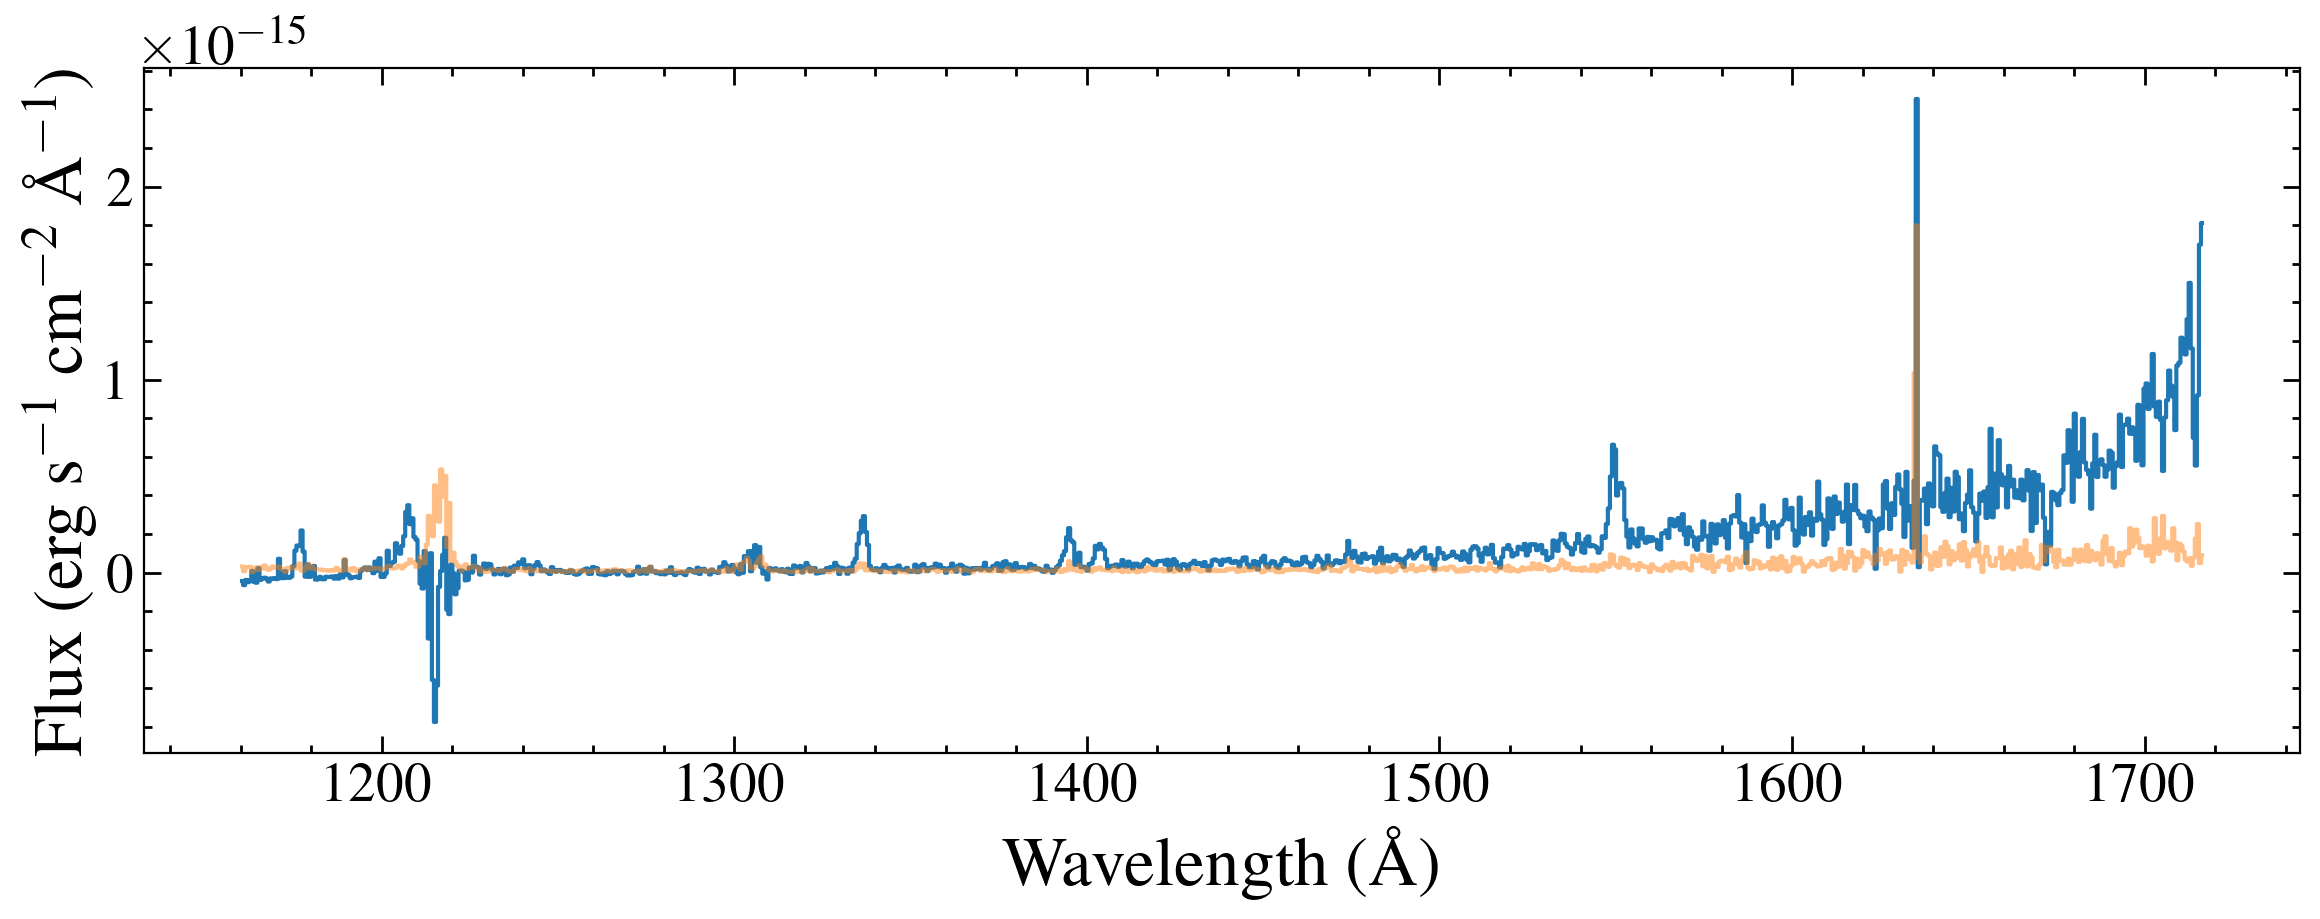

In [9]:
for x in hlsp[1:]:
    print(x)
    fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1', alpha=0.5)
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    plt.xlabel('Wavelength (\AA)', size=25)
    plt.tight_layout()
    plt.show()
    

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits
10.0


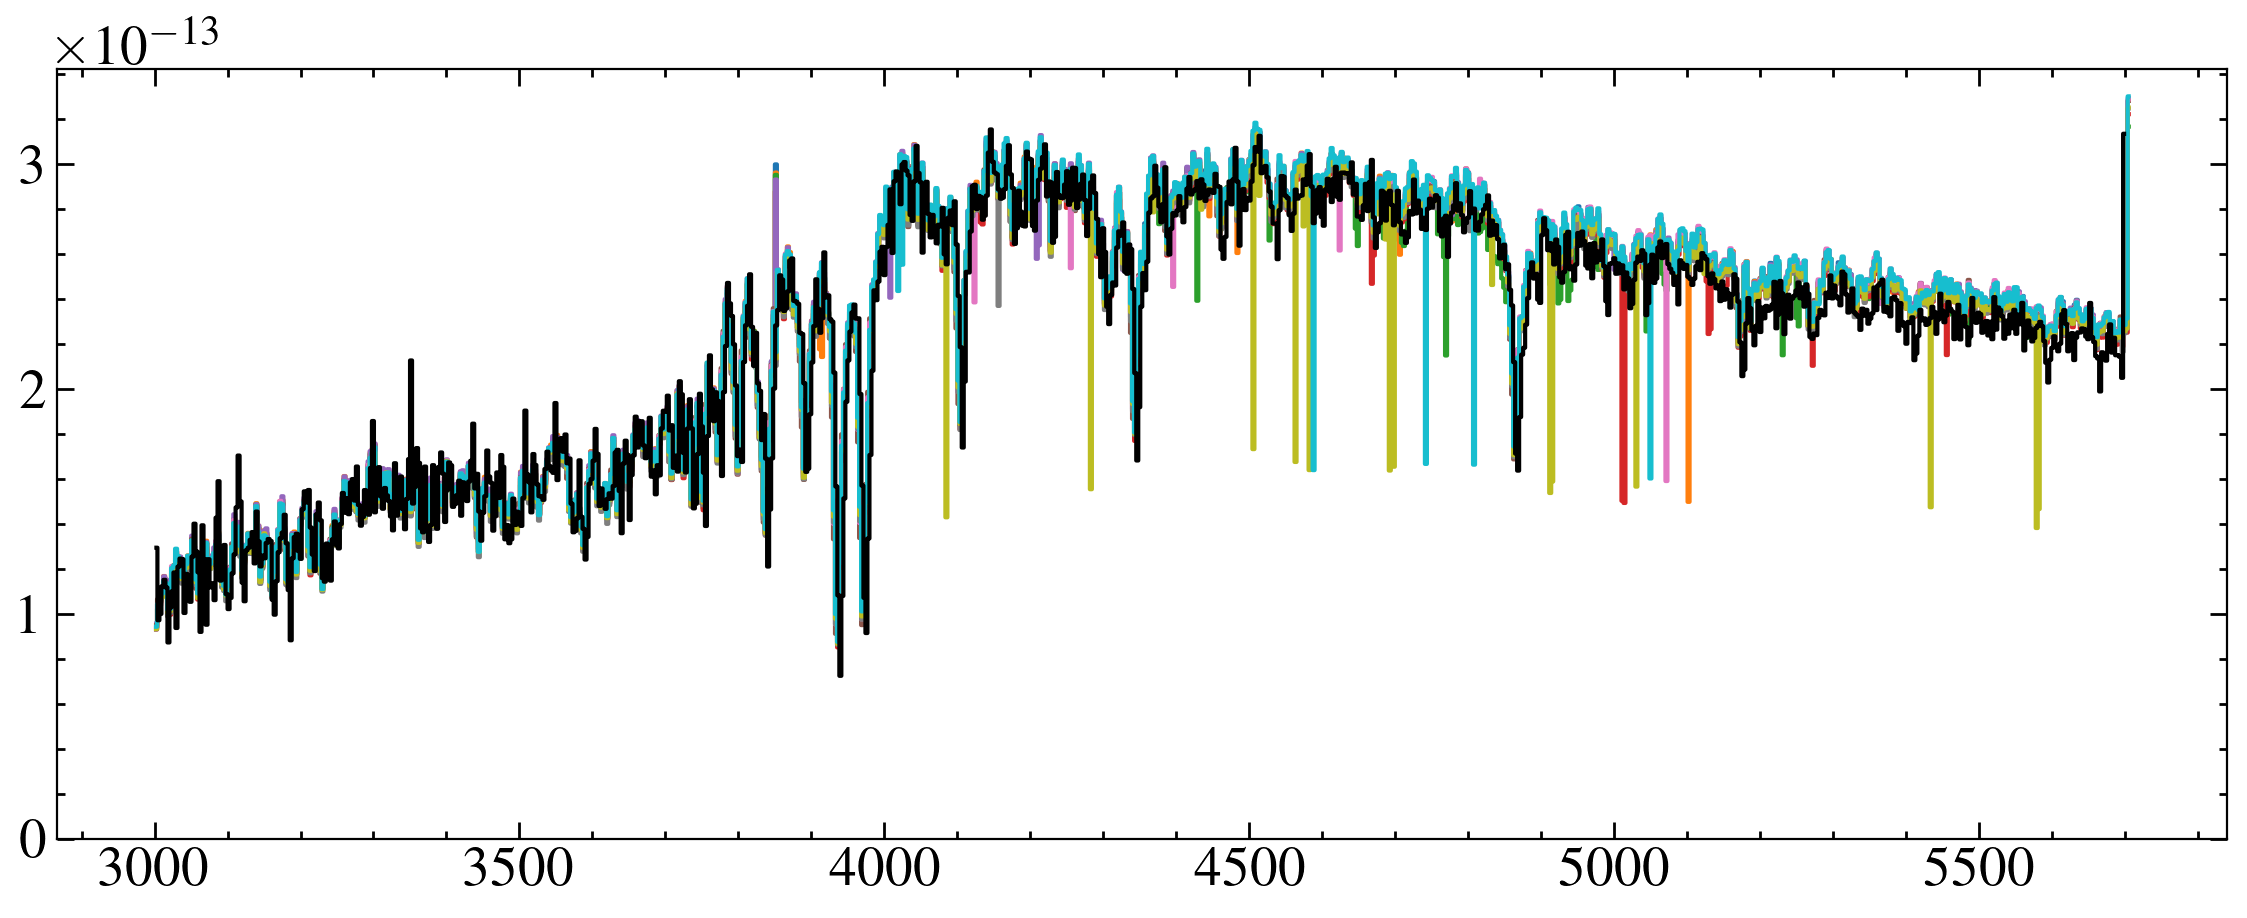

In [32]:
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    if grating in ['G430L']:#, 'G750L']:
        # print(fits.getheader(x, 0)['OPT_ELEM'])
        data = fits.getdata(x, 1)
#         print(fits.getheader(x, 0)['TEXPTIME'])
#         print(fits.getheader(x, 0)['APERTURE'])
        if fits.getheader(x, 0)['TEXPTIME'] > 2000:
            # print(data['A2Center'])
            # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
            for dt in data:
                w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
                if grating == 'G430L':
                    mask = w > 3000
                else:
                    mask = w > 1160

                w, f, e = w[mask], f[mask], e[mask]
                plt.step(w, f, where='mid')
                # plt.step(w, e, where='mid', c='C1')
            # plt.show()

        # plt.yscale('log')
        # plt.xscale('log')
plt.ylim(0)

for x in hlsp[0:1]:
    print(x)
    # fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    print(data['EXPTIME'][30])
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='k')
    # plt.step(w, e, where='mid', c='C1', alpha=0.5)
    # plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    # plt.xlabel('Wavelength (\AA)', size=25)
    # plt.tight_layout()
    plt.show()
    
w_opt, f_opt, e_opt =  w, f, e 

In [11]:
fits.getheader(x, 0)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'HST     '                                                            
INSTRUME= 'STIS    '                                                            
GRATING = 'G430L   '                                                            
APERTURE= '52X0.2  '                                                            
TARGNAME= 'WASP-121'                                                            
RA_TARG =       107.6002227084                                                  
DEC_TARG=      -39.09721845808                                                  
PROPOSID=                16701                                                  
HLSPNAME= 'MUSCLES Extension

In [12]:
x

'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits'

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


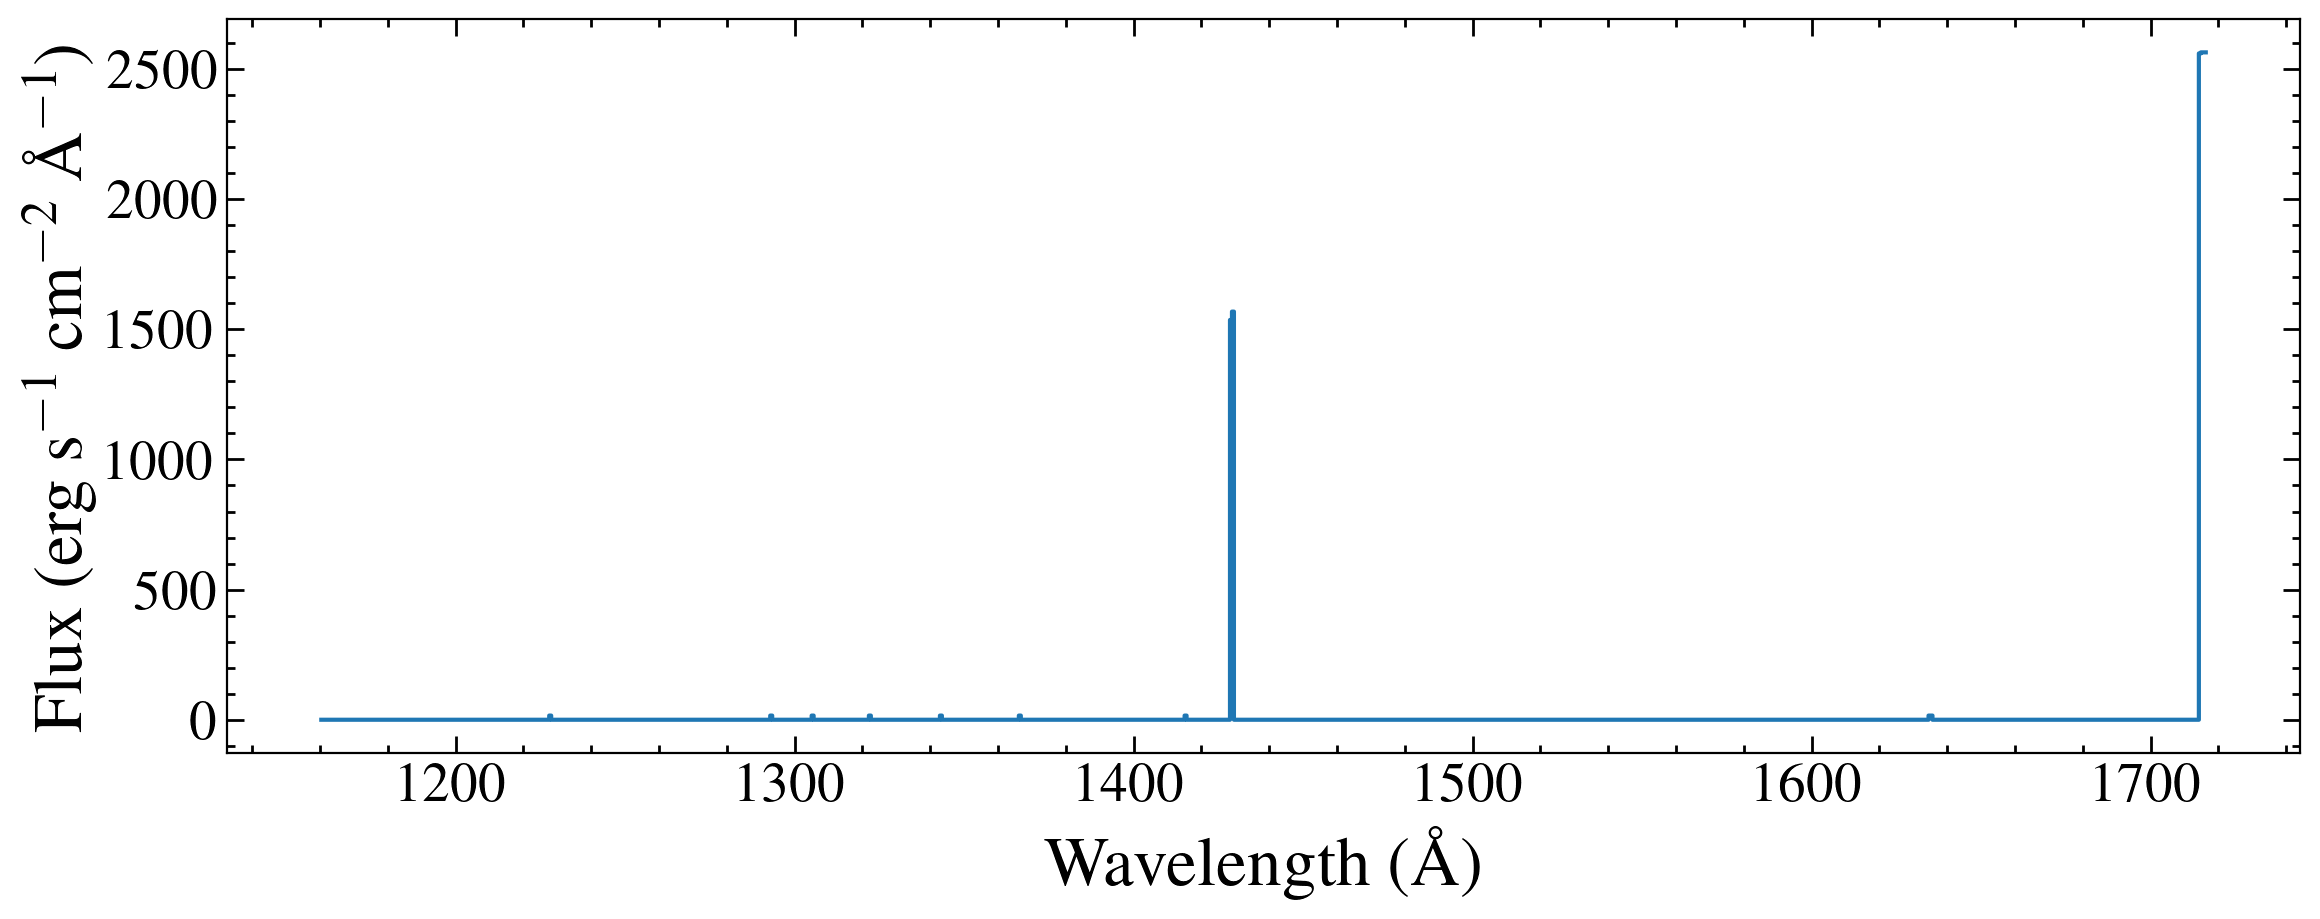

In [13]:
for x in hlsp[1:]:
    print(x)
    fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e, dq= data['WAVELENGTH'], data['FLUX'], data['ERROR'],data['DQ']
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e, dq = w[mask], f[mask], e[mask], dq[mask]
    # plt.step(w, f, where='mid', c='C0')
    # plt.step(w, e, where='mid', c='C1', alpha=0.5)
    plt.step(w, dq, where='mid')
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    plt.xlabel('Wavelength (\AA)', size=25)
    plt.tight_layout()
    plt.show()
    

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


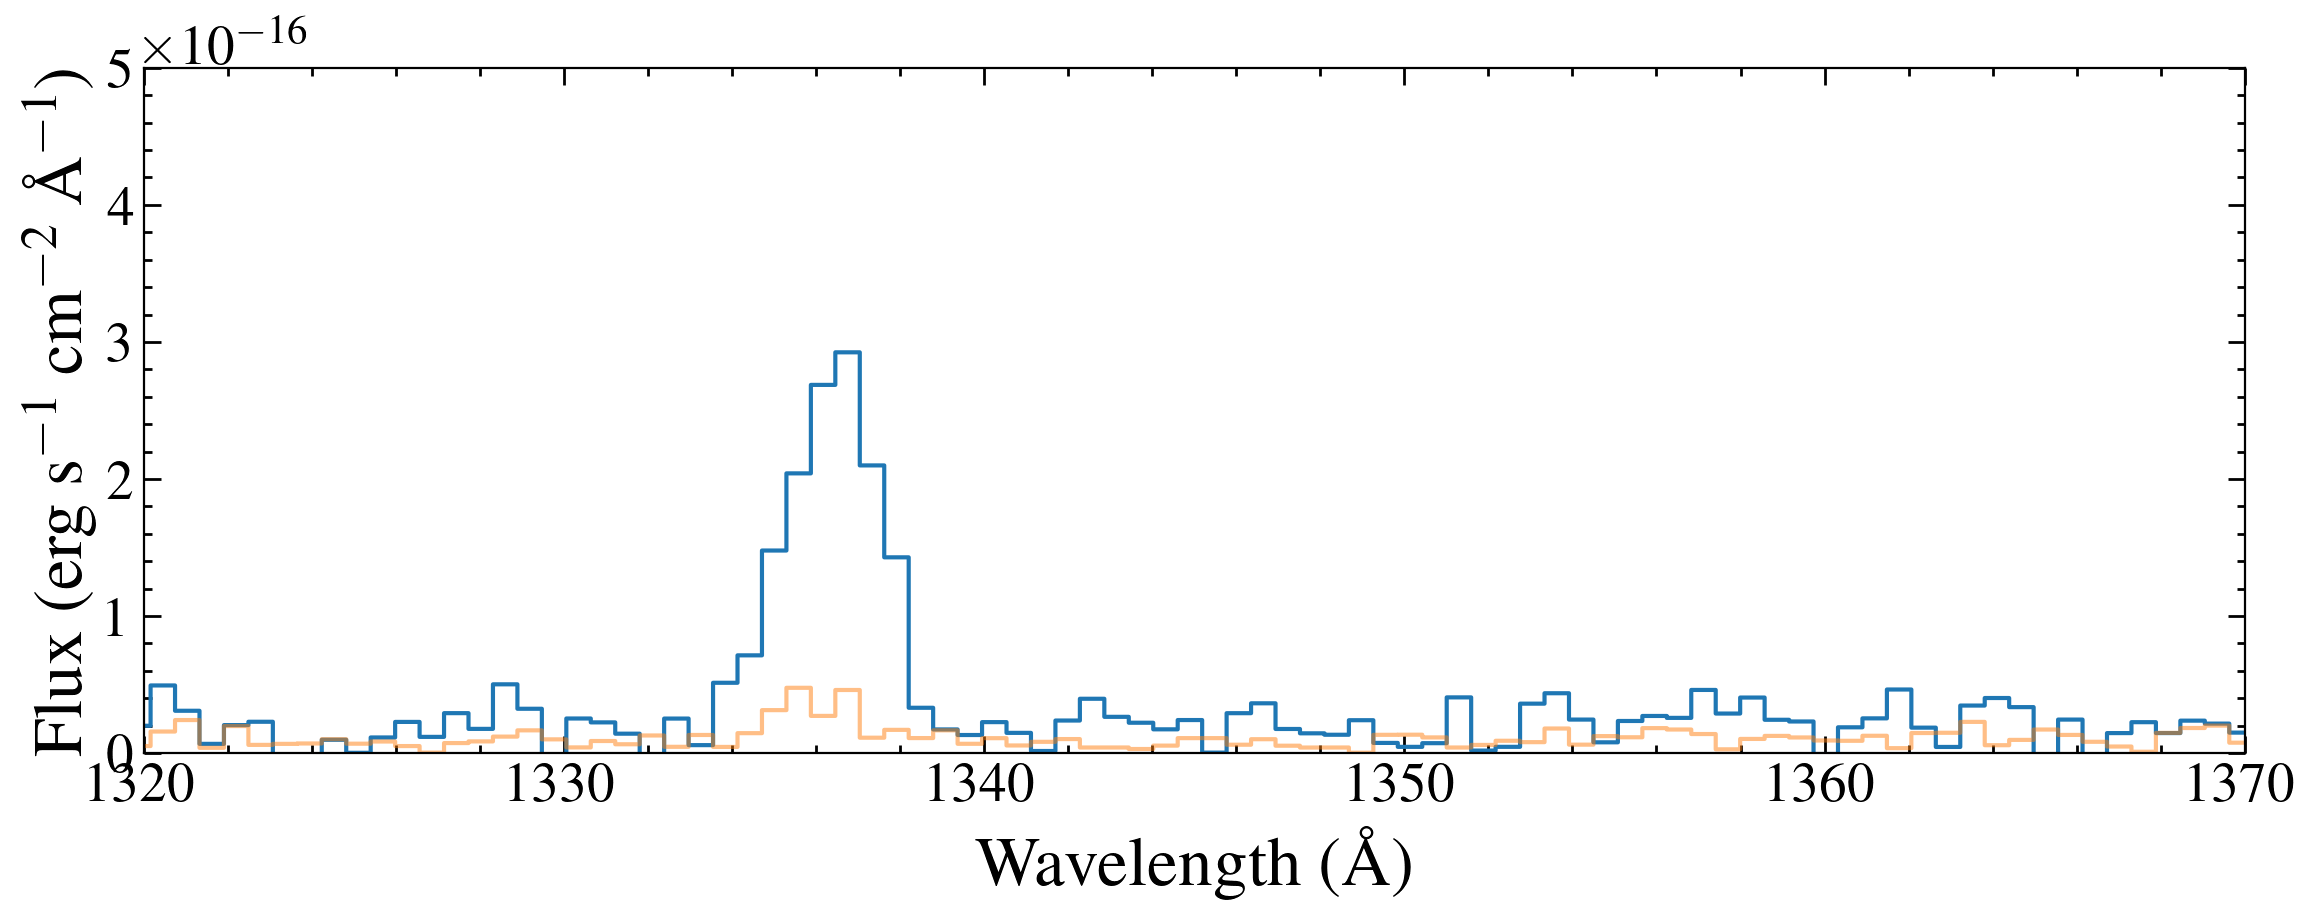

In [14]:
for x in hlsp[1:]:
    print(x)
    fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1', alpha=0.5)
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    plt.xlabel('Wavelength (\AA)', size=25)
    
    plt.xlim(1320, 1370)
    plt.ylim(0, 0.5e-15)
    plt.tight_layout()

    
    plt.show()
    

Need to look at extinction

In [15]:
from dust_extinction.parameter_averages import F99


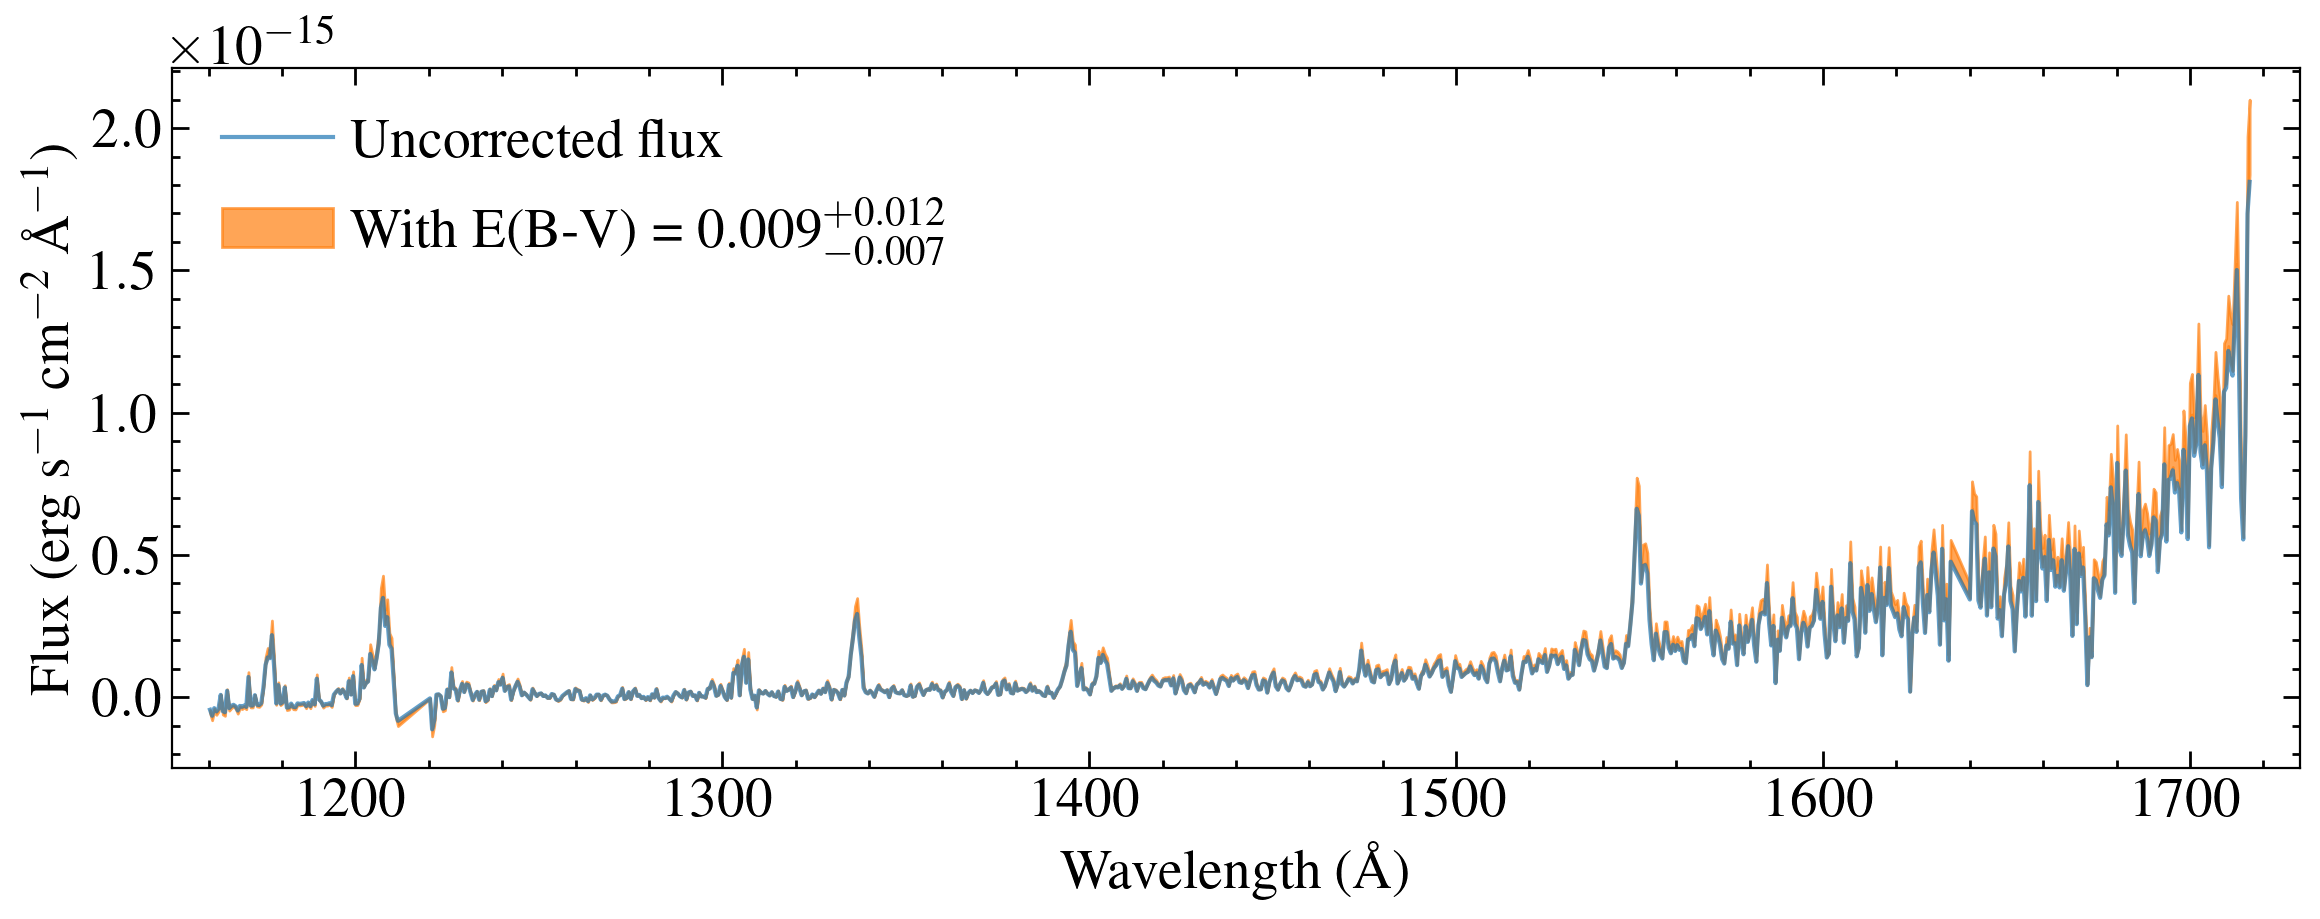

In [16]:



ebv = 0.009 #from https://arxiv.org/pdf/1506.02471.pdf, +0.012 -0.007 not too help
ebv_up = 0.012
ebv_lo = 0.007
ext = F99(Rv=3.1)

fig, ax = plt.subplots(figsize=(12, 5))

data = fits.getdata(hlsp[1], 1)
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
mask = (w > 1160) & (w <1212) | (w > 1220) & (w < 1635) | (w > 1640)
w, f, e = w[mask], f[mask], e[mask]

# plt.plot(w, f)
red = ext.extinguish(w*u.AA, Ebv=ebv)
red_up = ext.extinguish(w*u.AA, Ebv=ebv+ebv_up)
red_lo = ext.extinguish(w*u.AA, Ebv=ebv-ebv_lo)

# plt.plot(w, red)

ax.plot(w, f, alpha =0.7, label='Uncorrected flux')
# ax.step(w, f,where='mid', alpha =0.7, label='Uncorrected flux')
# plt.plot(w, f*red_up, alpha =0.7)
# plt.plot(w, f*red_lo, alpha =0.7)
ax.fill_between(w, f/red_up,f/red_lo, color='C1', alpha=0.7, label = r'With E(B-V) = {}$^{{+{}}}_{{-{}}}$'.format(ebv, ebv_up, ebv_lo))

ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')
ax.legend()
ax.set_xlim(1150, 1730)
fig.tight_layout()
# plt.yscale('log')

# plt.show()
# plt.plot(w, f/(f/red))


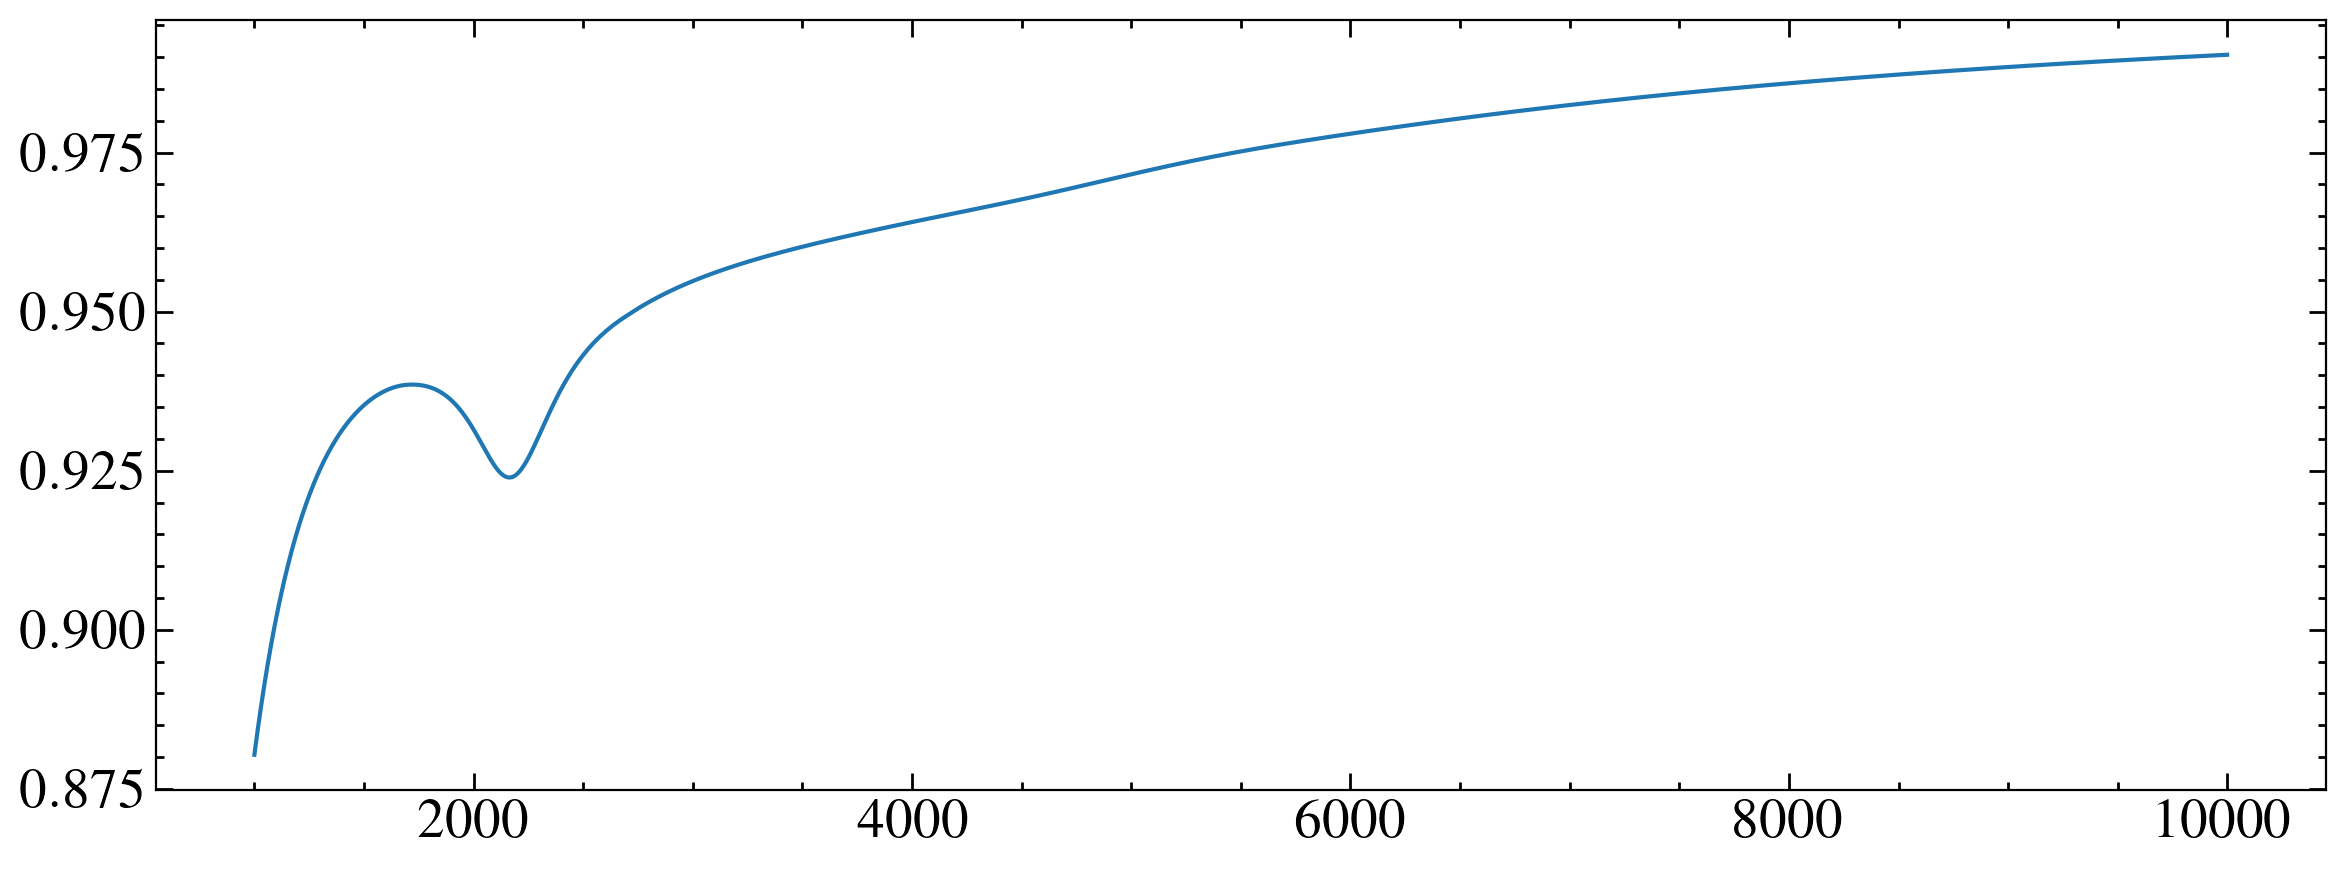

In [17]:
w_all = np.arange(1000, 10000)*u.AA
red = ext.extinguish(w_all, Ebv=ebv) 

plt.plot(w_all, red)

Ok so we can probably ignore the reddening? Phoenix model next. DEM and X-ray are in hand, need to add x-ray error calculation to prepare-xmm if I can.

In [18]:
import importlib
import prepare_phoenix_svo as pp
importlib.reload(pp)

<module 'prepare_phoenix_svo' from '/home/david/work/meats/SEDs/prepare_phoenix_svo.py'>

In [21]:
G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
mass = 1.353

teff = 6459
teff_e = 140
radius = 1.458
distance = 272.01
save_path = 'models/'
star = 'wasp-121'
# g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
g = 4.242
# print(np.log10(g.value))
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc, 'Teff_e':teff_e}
# pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=True, make_error=True)
normfac = ((radius*R)/(distance*u.pc.to(u.m)))**2

In [ ]:
pdata = Table.read('models/wasp-121_phoenix_interpolated.ecsv')
pw, pf, pe = pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR']


/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2010_x1d.fits


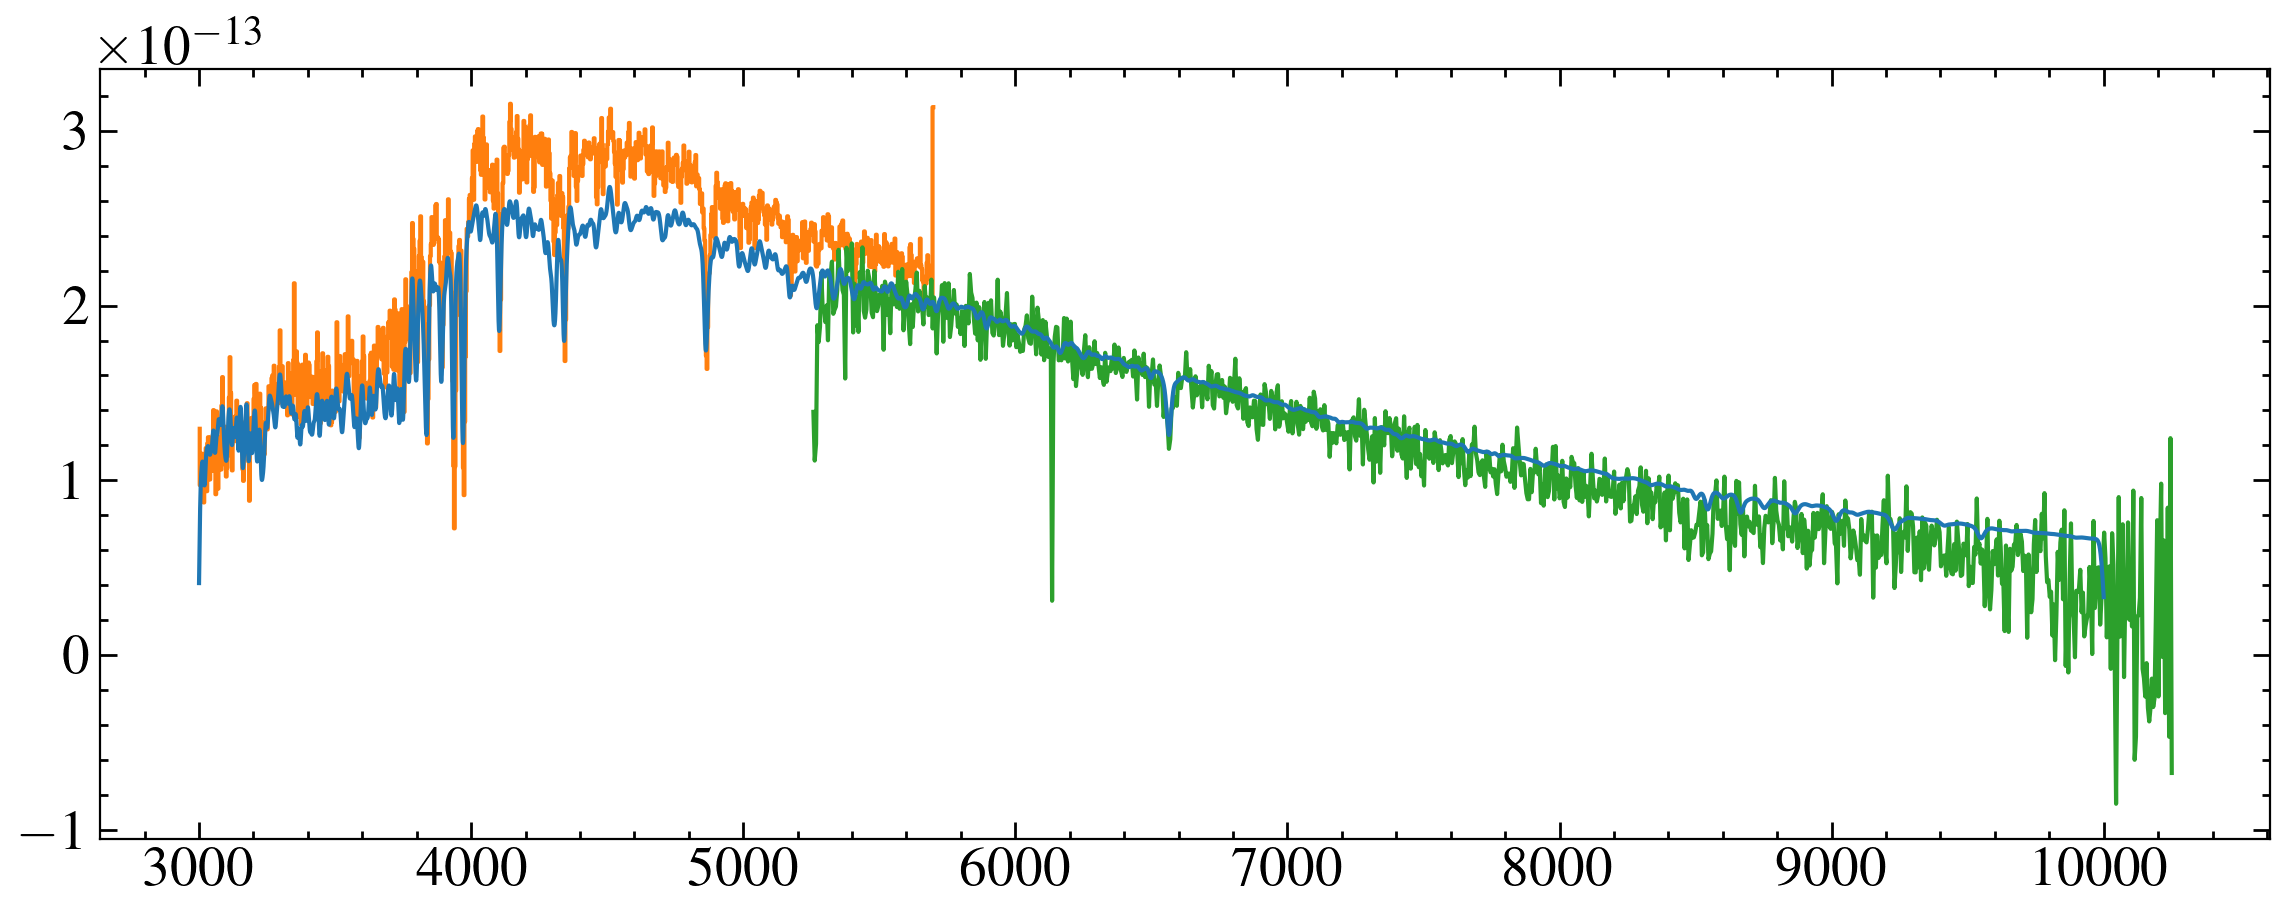

In [48]:

# plt.plot(pw, pf*normfac)
pmask = (pw > 3000) & (pw < 1e4)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)
plt.plot(pwi, pfi)
# plt.yscale('log')
# plt.xscale('log')
# plt.step(w_opt, f_opt, label='G430L')
# plt.step(w_nuv, f_nuv, label='G230L')
# plt.step(w_lya, f_lya, label='G140M')
# plt.step(w, f, where='mid')
plt.step(w_opt, f_opt, label='G430L', zorder=-1)
# plt.ylim(1e-18)

for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L':
        print(x)
        data = fits.getdata(x, 1)[0]
        plt.plot(data['WAVELENGTH'], data['FLUX'], zorder=-1)
        break
    

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2010_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2030_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2050_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2070_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2090_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2020_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2040_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2060_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2080_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma20a0_sx1.fits


(0.0, 3e-13)

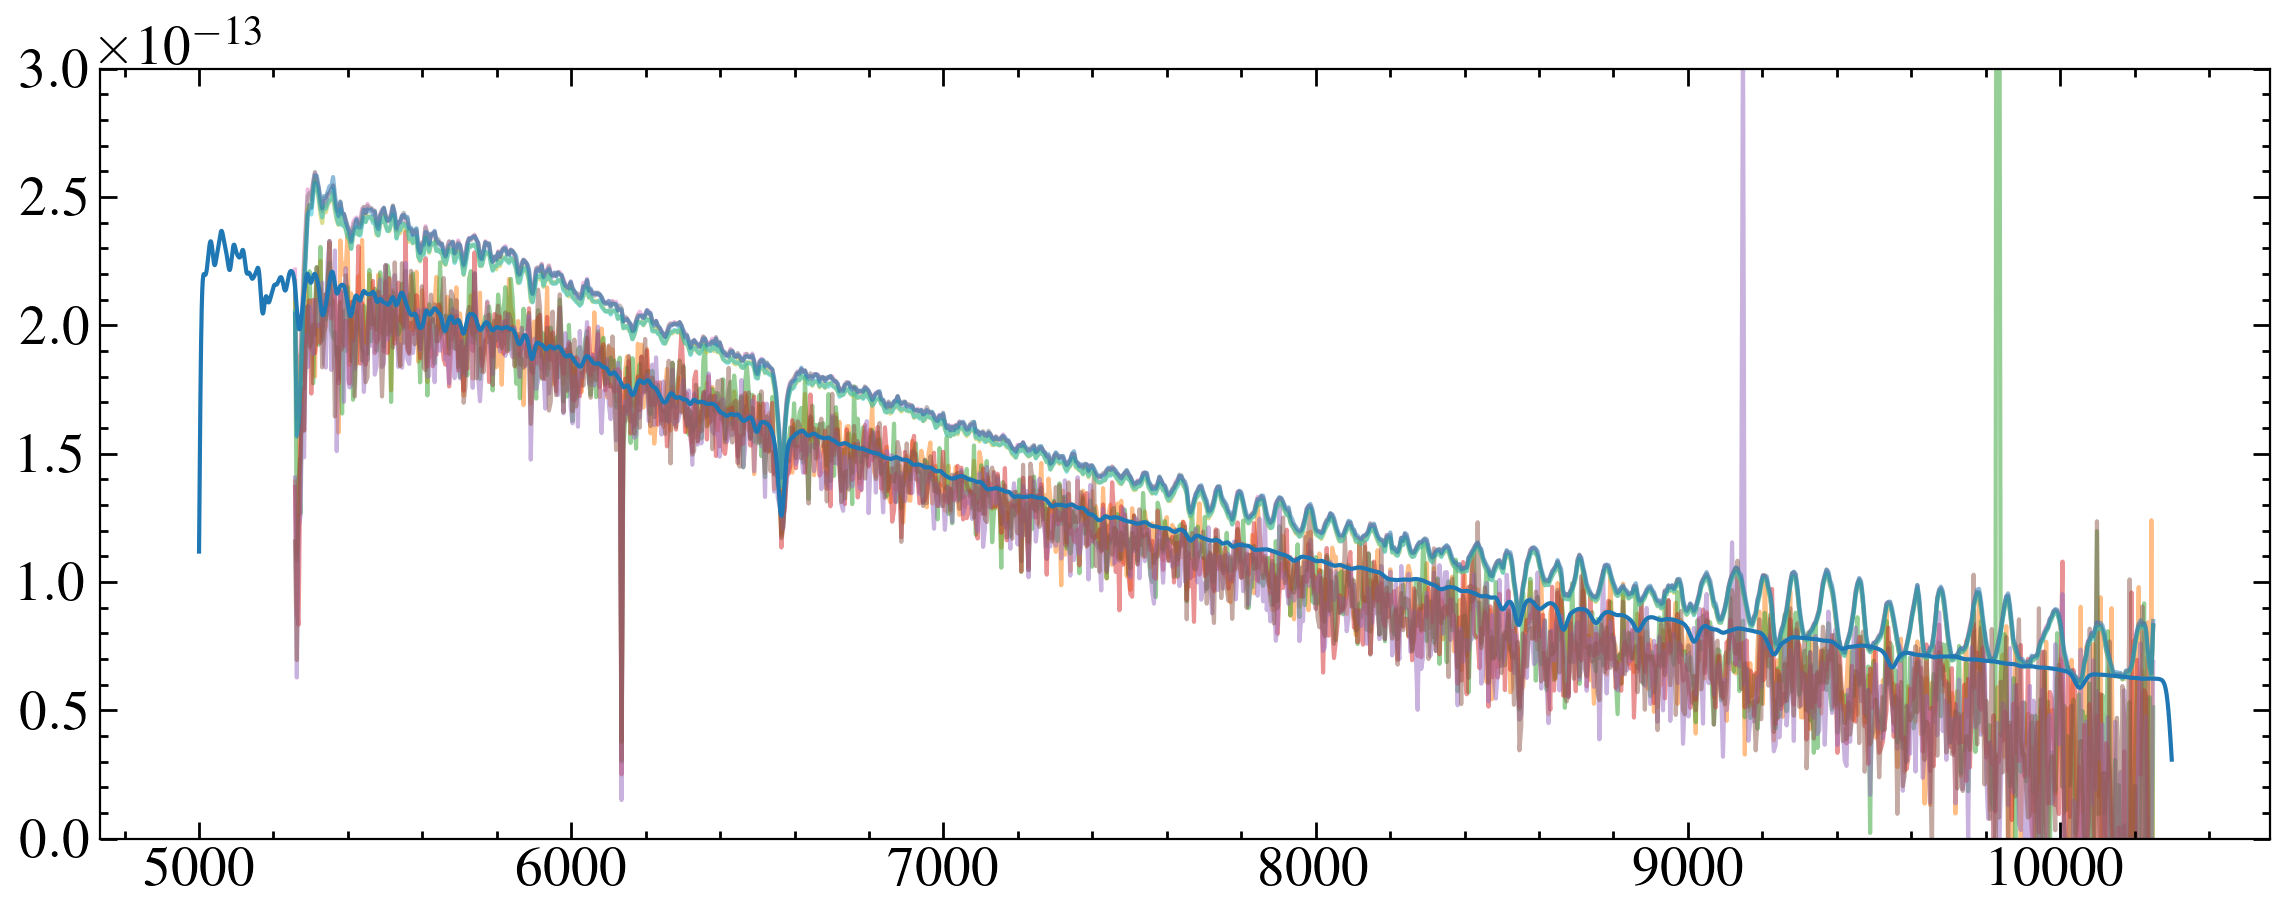

In [74]:
pmask = (pw > 5000) & (pw < 10300)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)
plt.plot(pwi, pfi)

for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L':
        print(x)
        data = fits.getdata(x, 1)[0]
        plt.plot(data['WAVELENGTH'], data['FLUX'], zorder=-1, alpha=0.5)
        
plt.ylim(0, 3e-13)


(5100.0, 12000.0)

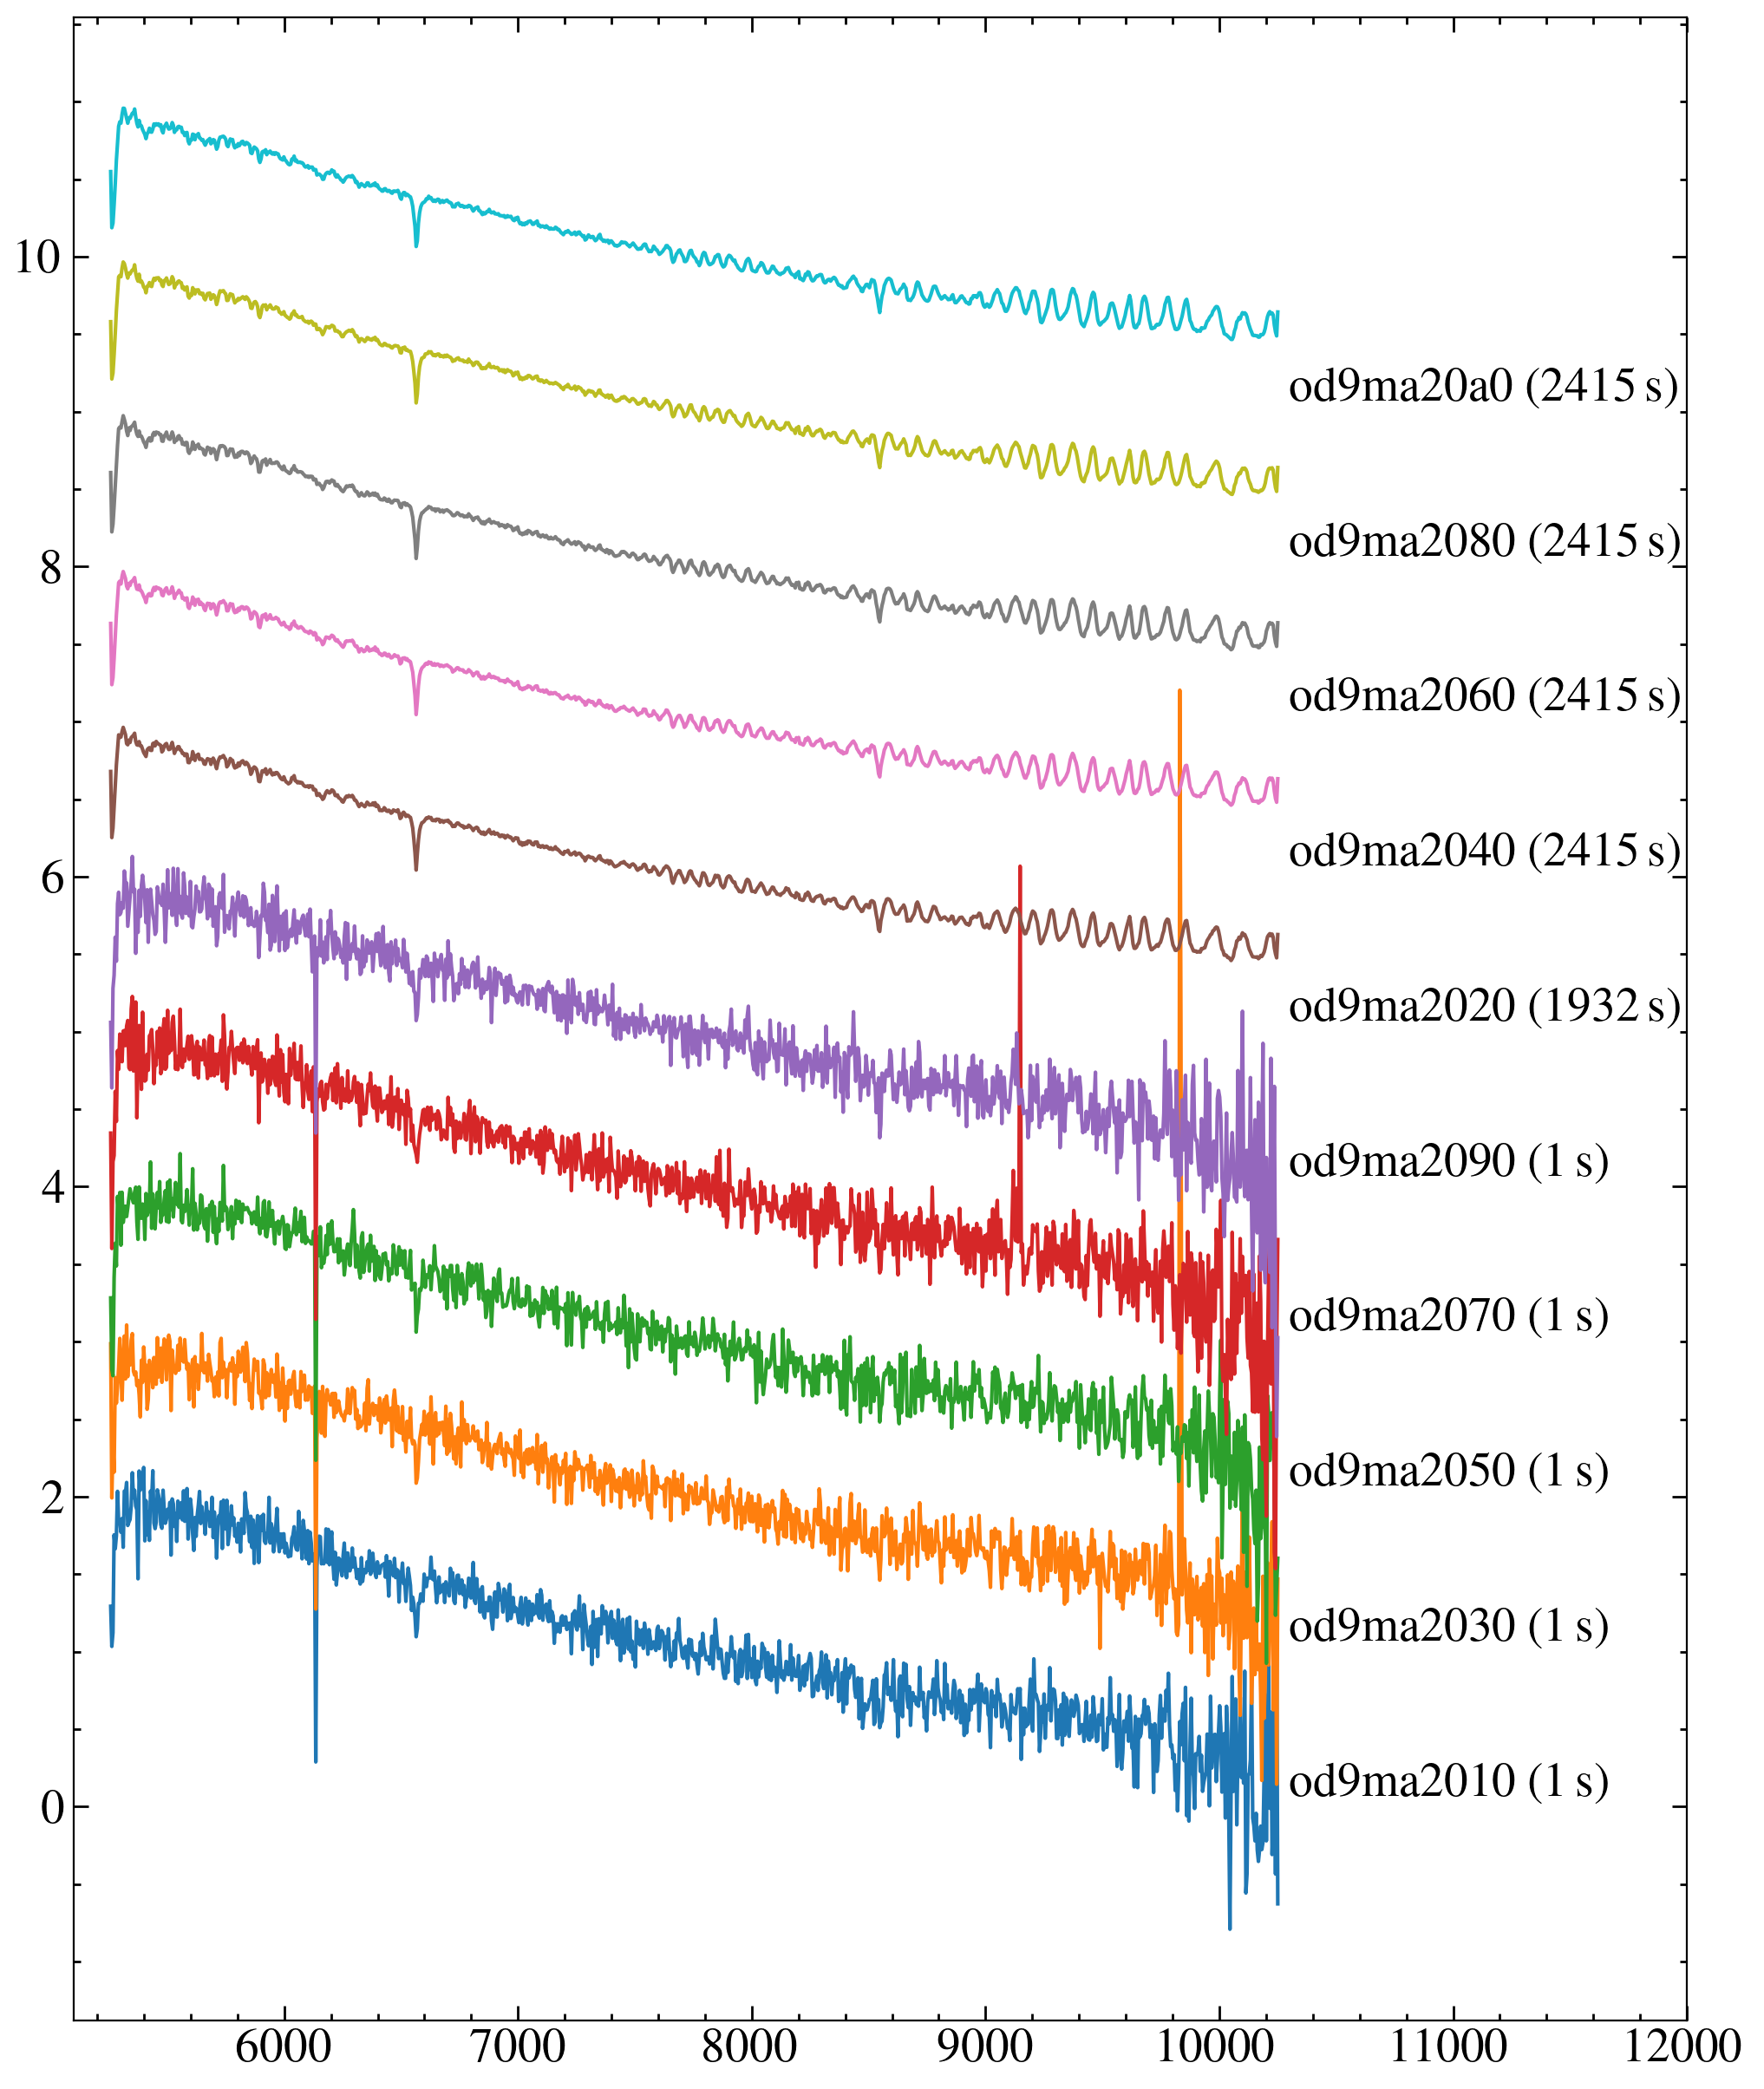

In [73]:
g750ls = []
for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L':
        g750ls.append(x)

fig, ax = plt.subplots(figsize=(12, 15))

for i, x in enumerate(g750ls):
    hdr = fits.getheader(x, 0) 
    data = fits.getdata(x, 1)[0]
    w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
    norm = np.median(f)
    plt.plot(w, (f/norm)+i)
    root, time = hdr['ROOTNAME'], hdr['TEXPTIME']
    plt.annotate('{} ({:.0f}\,s)'.format(root, time), (10300, i), xycoords='data', va='bottom')
    
ax.set_xlim(5100, 12000)


In [78]:
import stistools

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [84]:
os.environ['oref'] = path

In [88]:
g750ls = []
for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L' and fits.getheader(x, 0)['TEXPTIME'] > 10:
        g750ls.append(x)
g750ls

['/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2020_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2040_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2060_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2080_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma20a0_sx1.fits']

od9ma2020 OD9MA20B0
File written:  /media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma20b0_crj.fits
mkfringeflat.py version 0.1
 - matching fringes in a flatfield to those in science data
 Extraction center: row 58
   Extraction size: 11.0 pixels  [Aperture: 52X2]
Range to be normalized: [53:64,4:1020]

Determining best shift for fringe flat

shift =     -0.500, rms =   0.0288
shift =     -0.400, rms =   0.0275
shift =     -0.300, rms =   0.0267
shift =     -0.200, rms =   0.0264
shift =     -0.100, rms =   0.0268
shift =      0.000, rms =   0.0277
shift =      0.100, rms =   0.0282
shift =      0.200, rms =   0.0292
shift =      0.300, rms =   0.0307
shift =      0.400, rms =   0.0325
shift =      0.500, rms =   0.0347
shift =      0.600, rms =   0.0372
shift =      0.700, rms =   0.0398
shift =      0.800, rms =   0.0426
shift =      0.900, rms =   0.0456
shift =      1.000, rms =   0.0486
shift =      1.100, rms =   0.0508
shift =      1.200, rms =   0.0532
shift =      1.300, r

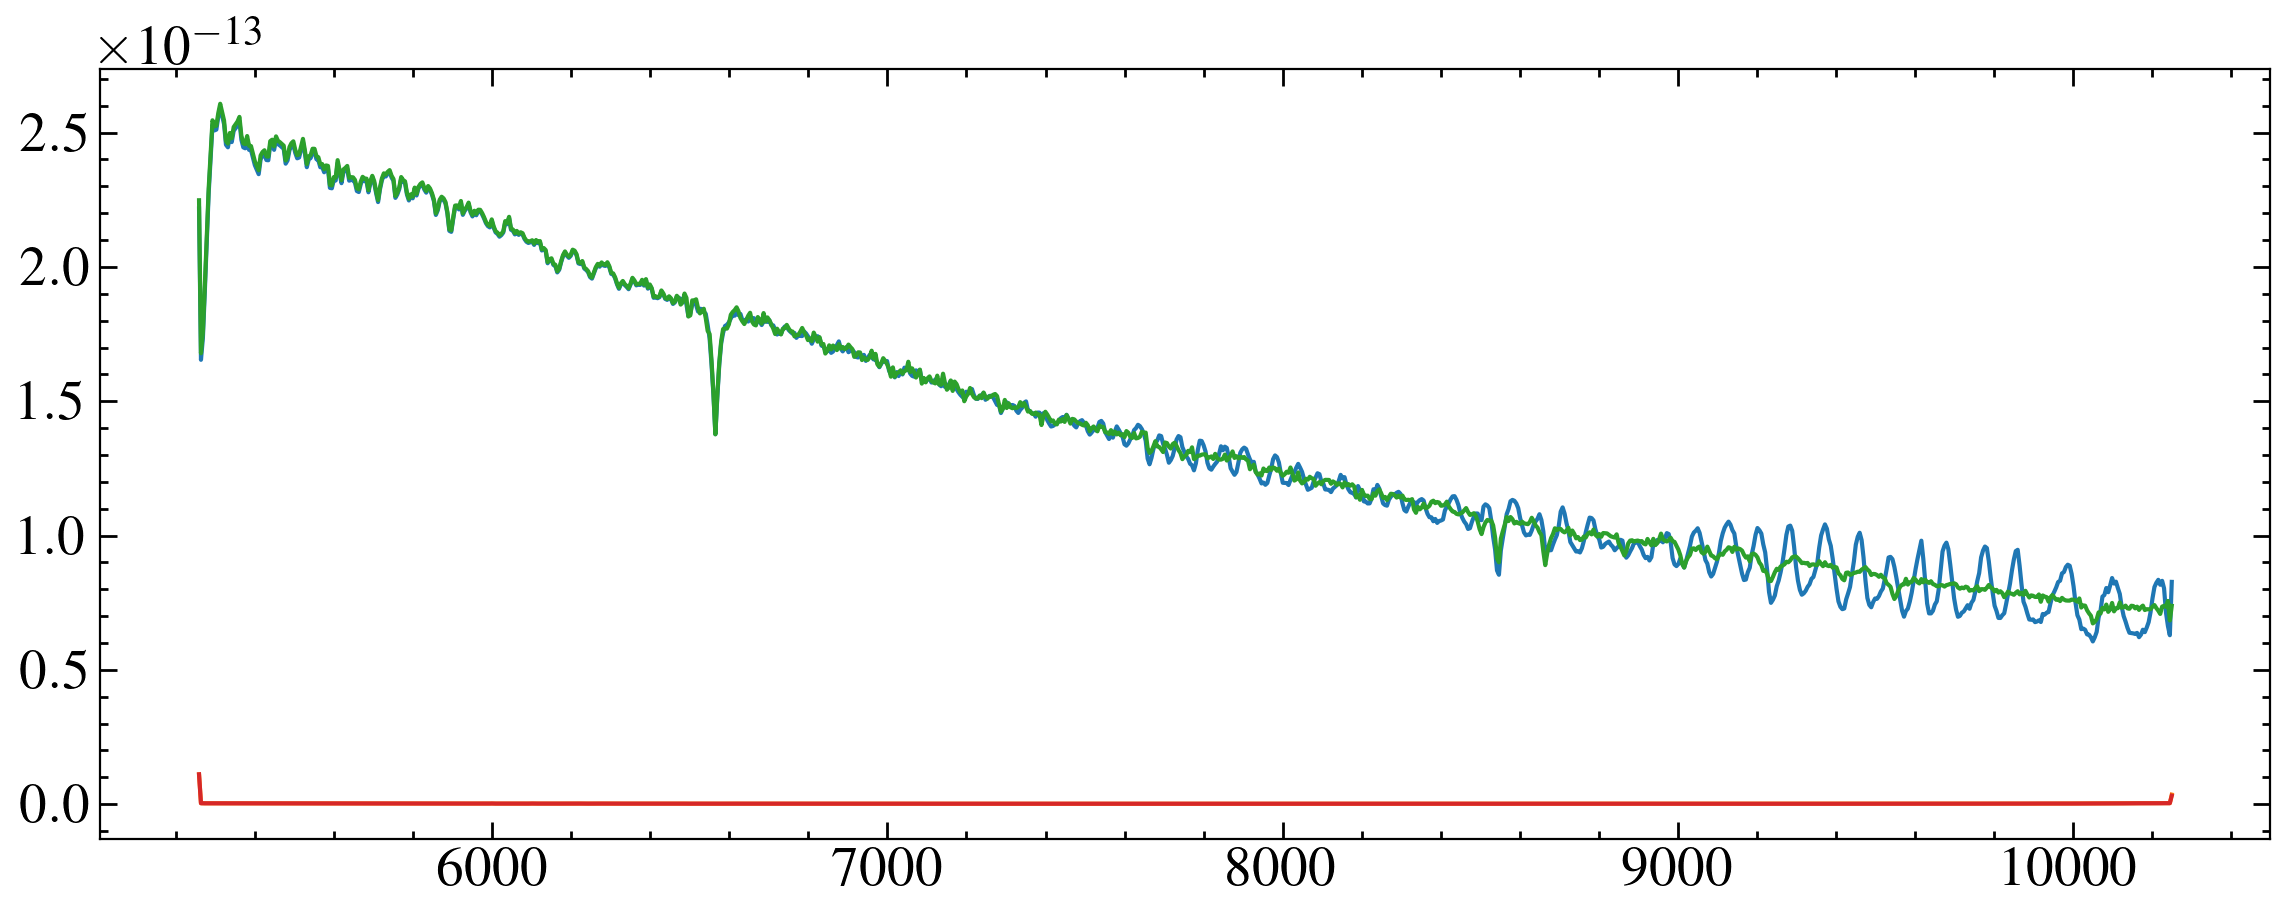

od9ma2040 OD9MA20B0
File written:  /media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma20b0_crj.fits
mkfringeflat.py version 0.1
 - matching fringes in a flatfield to those in science data
 Extraction center: row 58
   Extraction size: 11.0 pixels  [Aperture: 52X2]
Range to be normalized: [53:64,4:1020]

Determining best shift for fringe flat

shift =     -0.500, rms =   0.0310
shift =     -0.400, rms =   0.0293
shift =     -0.300, rms =   0.0280
shift =     -0.200, rms =   0.0272
shift =     -0.100, rms =   0.0271
shift =      0.000, rms =   0.0275
shift =      0.100, rms =   0.0274
shift =      0.200, rms =   0.0280
shift =      0.300, rms =   0.0291
shift =      0.400, rms =   0.0306
shift =      0.500, rms =   0.0325
shift =      0.600, rms =   0.0347
shift =      0.700, rms =   0.0372
shift =      0.800, rms =   0.0399
shift =      0.900, rms =   0.0427
shift =      1.000, rms =   0.0457
shift =      1.100, rms =   0.0478
shift =      1.200, rms =   0.0502
shift =      1.300, r

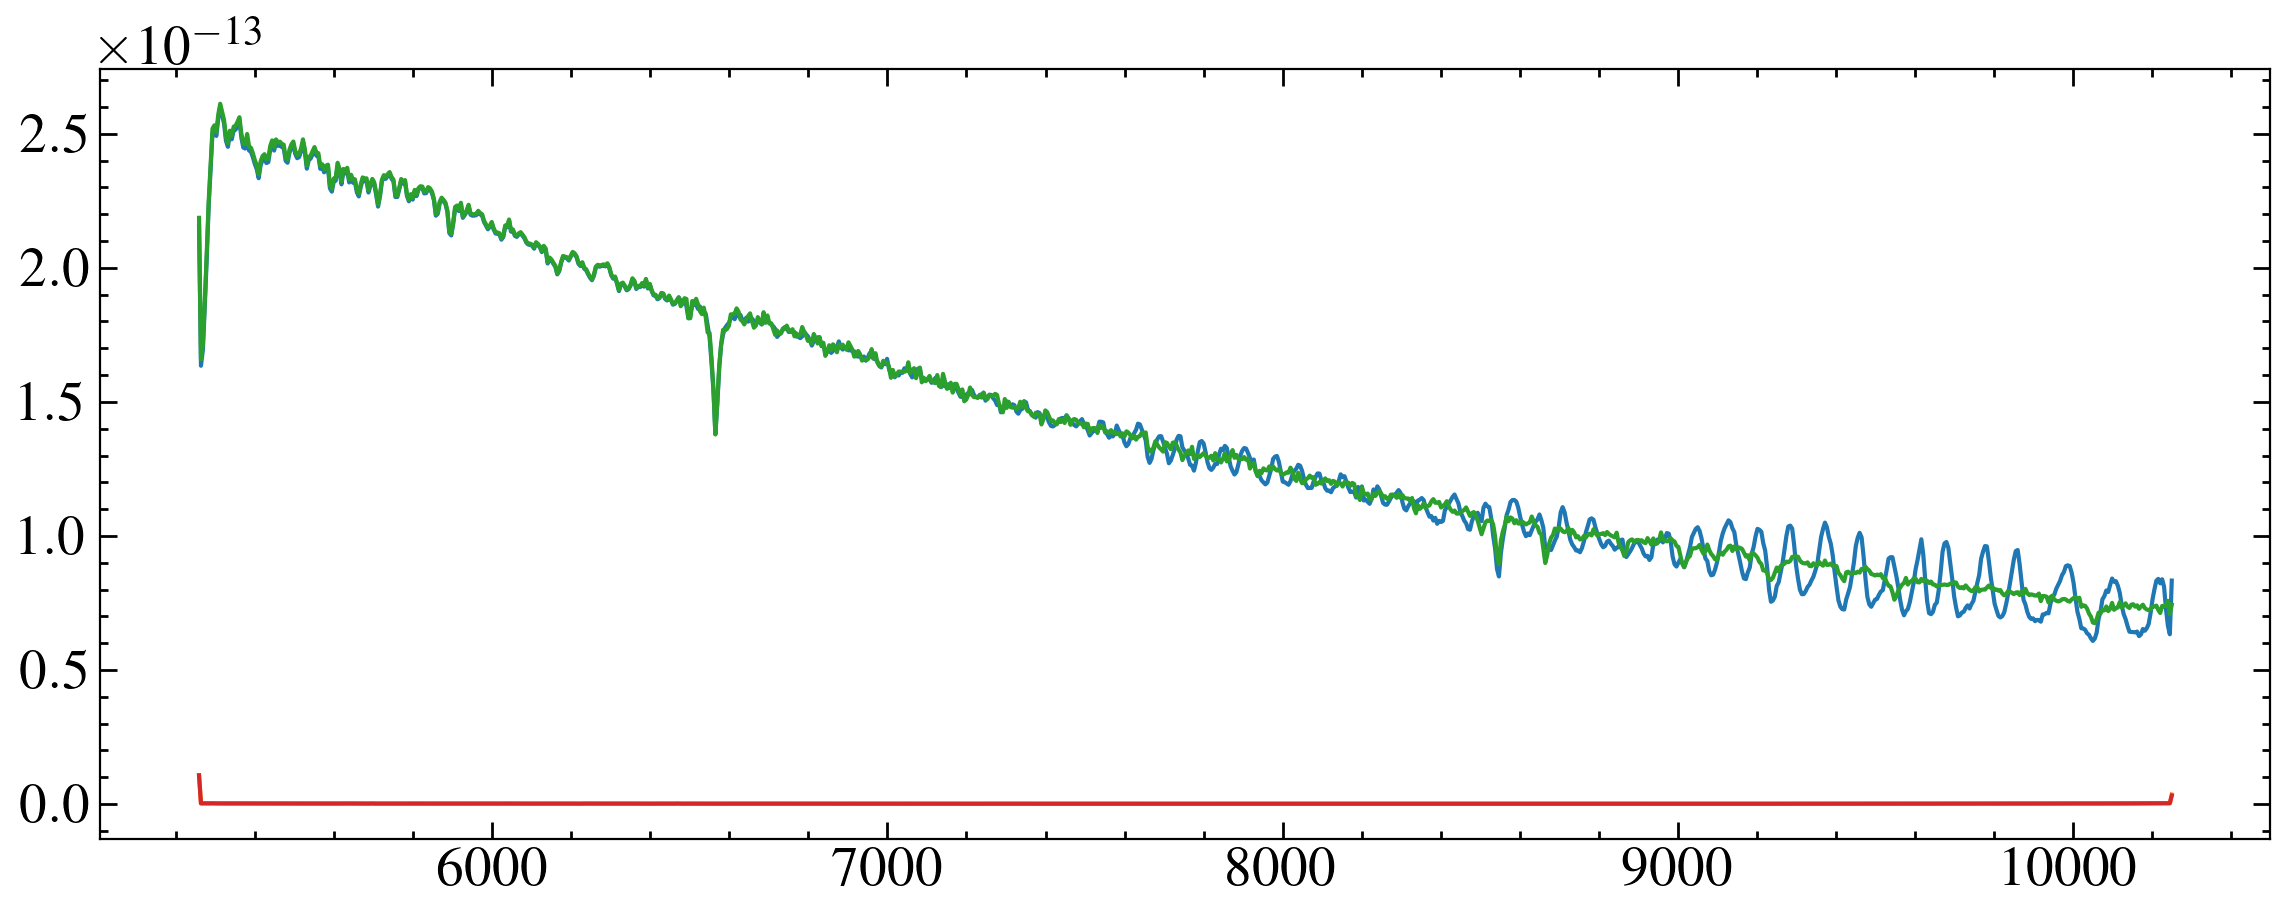

od9ma2060 OD9MA20B0
File written:  /media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma20b0_crj.fits
mkfringeflat.py version 0.1
 - matching fringes in a flatfield to those in science data
 Extraction center: row 58
   Extraction size: 11.0 pixels  [Aperture: 52X2]
Range to be normalized: [53:64,4:1020]

Determining best shift for fringe flat

shift =     -0.500, rms =   0.0320
shift =     -0.400, rms =   0.0300
shift =     -0.300, rms =   0.0285
shift =     -0.200, rms =   0.0274
shift =     -0.100, rms =   0.0269
shift =      0.000, rms =   0.0270
shift =      0.100, rms =   0.0267
shift =      0.200, rms =   0.0270
shift =      0.300, rms =   0.0278
shift =      0.400, rms =   0.0291
shift =      0.500, rms =   0.0309
shift =      0.600, rms =   0.0330
shift =      0.700, rms =   0.0354
shift =      0.800, rms =   0.0380
shift =      0.900, rms =   0.0408
shift =      1.000, rms =   0.0437
shift =      1.100, rms =   0.0458
shift =      1.200, rms =   0.0481
shift =      1.300, r

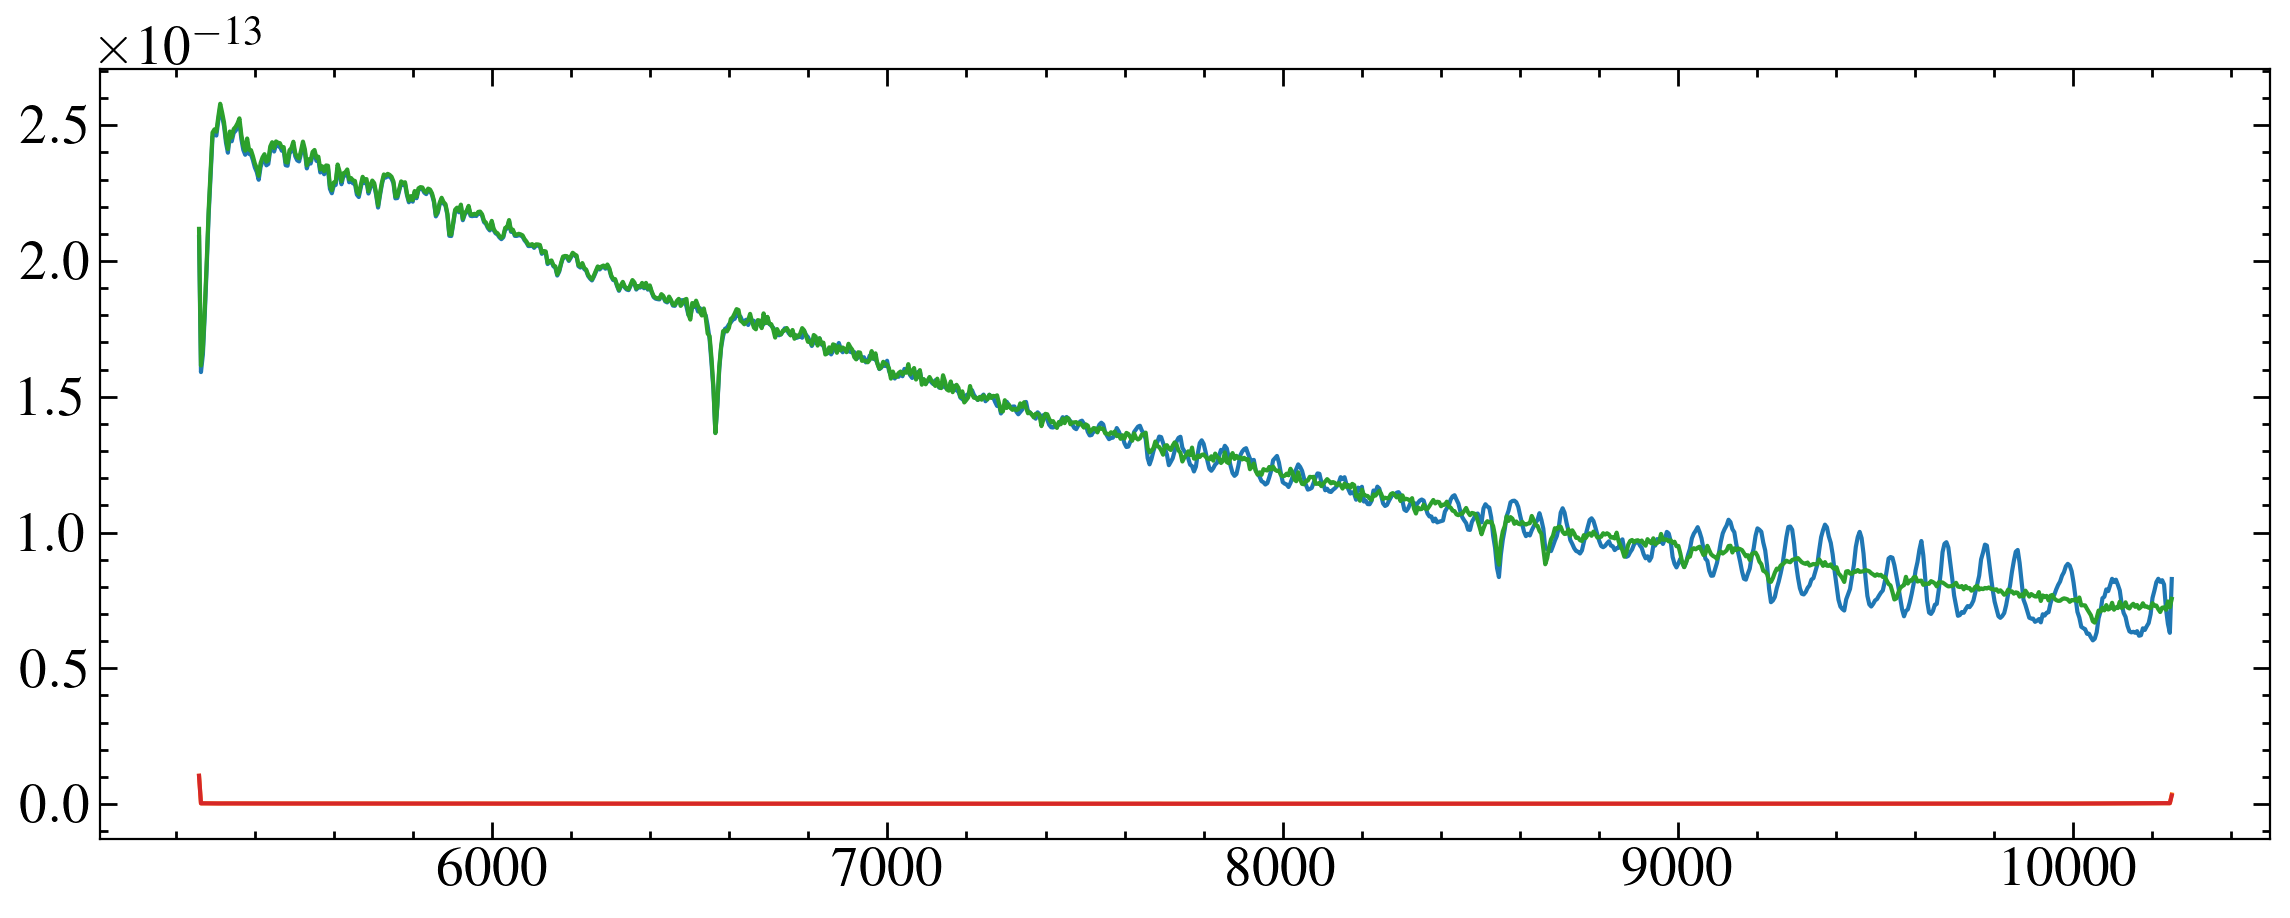

od9ma2080 OD9MA20B0
File written:  /media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma20b0_crj.fits
mkfringeflat.py version 0.1
 - matching fringes in a flatfield to those in science data
 Extraction center: row 58
   Extraction size: 11.0 pixels  [Aperture: 52X2]
Range to be normalized: [53:64,4:1020]

Determining best shift for fringe flat

shift =     -0.500, rms =   0.0336
shift =     -0.400, rms =   0.0314
shift =     -0.300, rms =   0.0297
shift =     -0.200, rms =   0.0284
shift =     -0.100, rms =   0.0277
shift =      0.000, rms =   0.0275
shift =      0.100, rms =   0.0269
shift =      0.200, rms =   0.0269
shift =      0.300, rms =   0.0274
shift =      0.400, rms =   0.0285
shift =      0.500, rms =   0.0300
shift =      0.600, rms =   0.0320
shift =      0.700, rms =   0.0342
shift =      0.800, rms =   0.0367
shift =      0.900, rms =   0.0394
shift =      1.000, rms =   0.0423
shift =      1.100, rms =   0.0443
shift =      1.200, rms =   0.0466
shift =      1.300, r

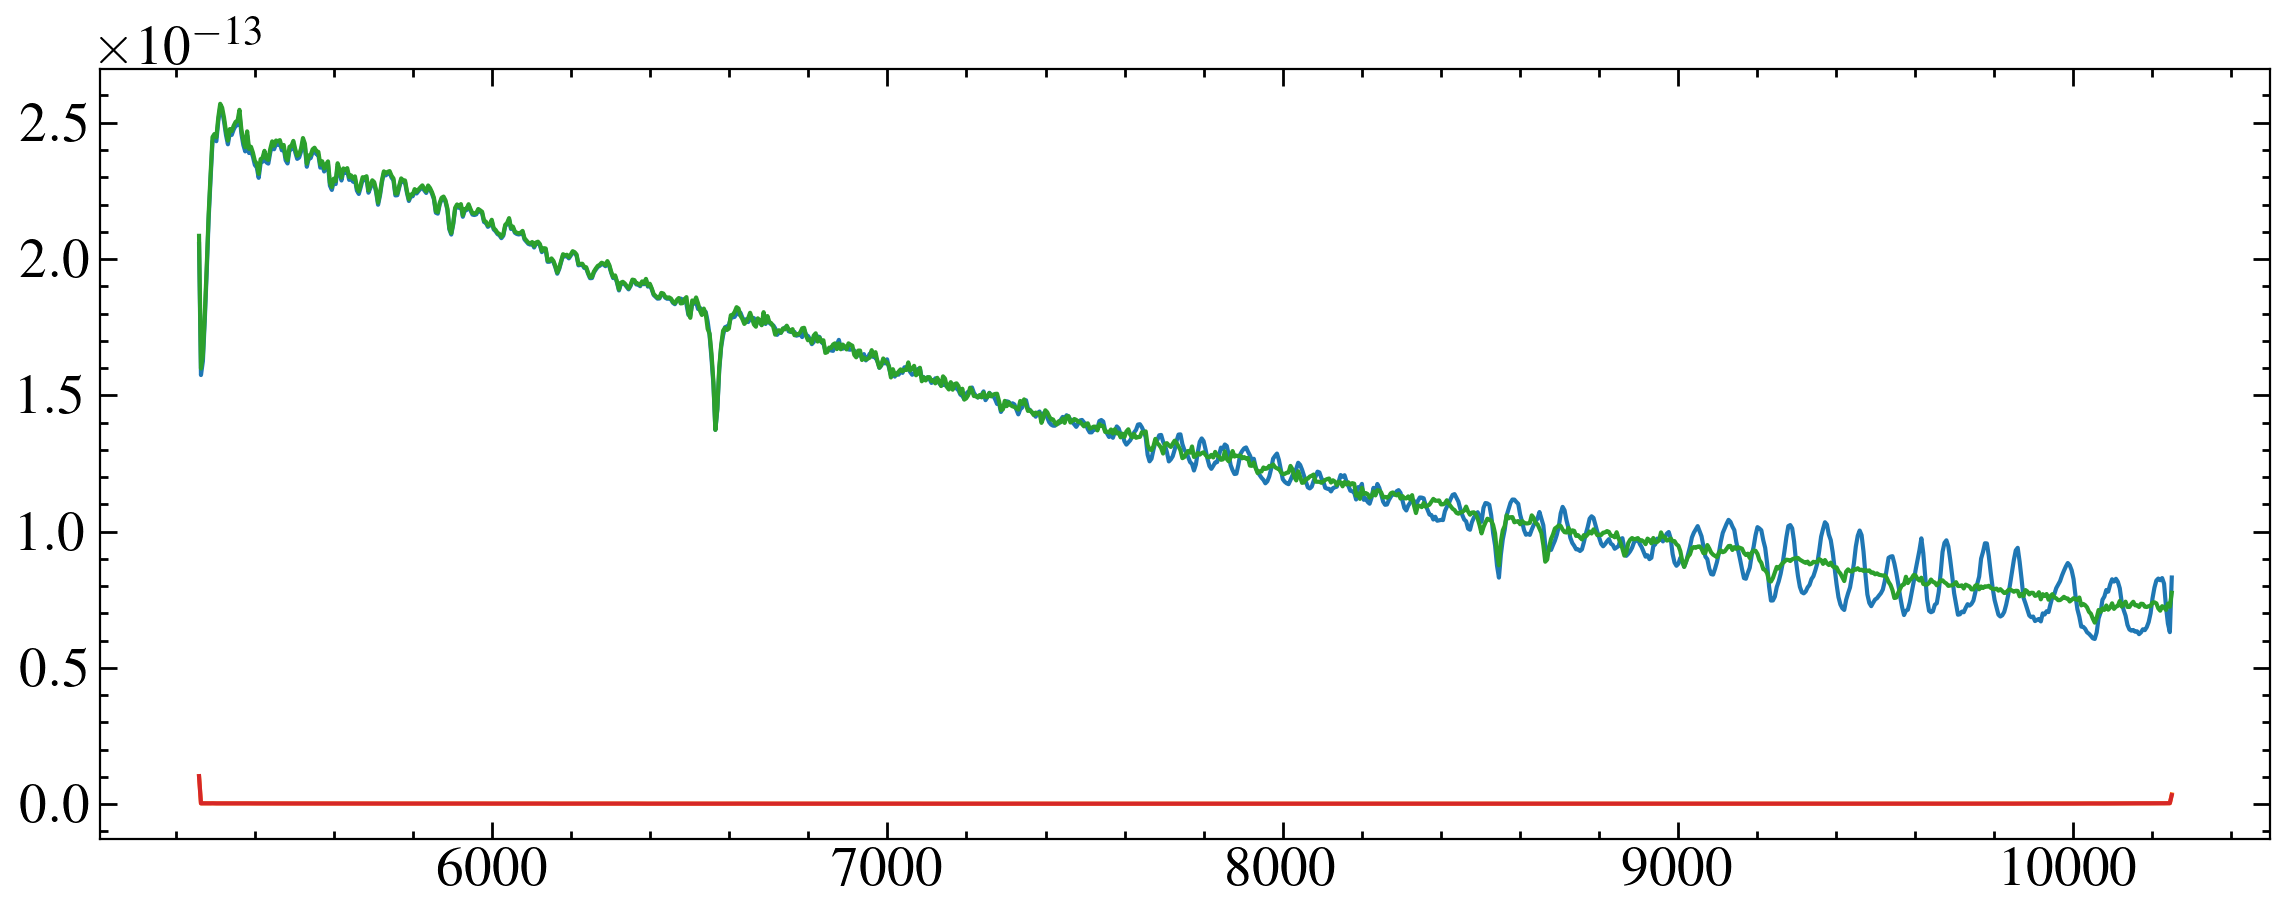

od9ma20a0 OD9MA20B0
File written:  /media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma20b0_crj.fits
mkfringeflat.py version 0.1
 - matching fringes in a flatfield to those in science data
 Extraction center: row 58
   Extraction size: 11.0 pixels  [Aperture: 52X2]
Range to be normalized: [53:64,4:1020]

Determining best shift for fringe flat

shift =     -0.500, rms =   0.0356
shift =     -0.400, rms =   0.0332
shift =     -0.300, rms =   0.0312
shift =     -0.200, rms =   0.0296
shift =     -0.100, rms =   0.0284
shift =      0.000, rms =   0.0278
shift =      0.100, rms =   0.0267
shift =      0.200, rms =   0.0262
shift =      0.300, rms =   0.0263
shift =      0.400, rms =   0.0269
shift =      0.500, rms =   0.0281
shift =      0.600, rms =   0.0298
shift =      0.700, rms =   0.0318
shift =      0.800, rms =   0.0341
shift =      0.900, rms =   0.0367
shift =      1.000, rms =   0.0394
shift =      1.100, rms =   0.0414
shift =      1.200, rms =   0.0436
shift =      1.300, r

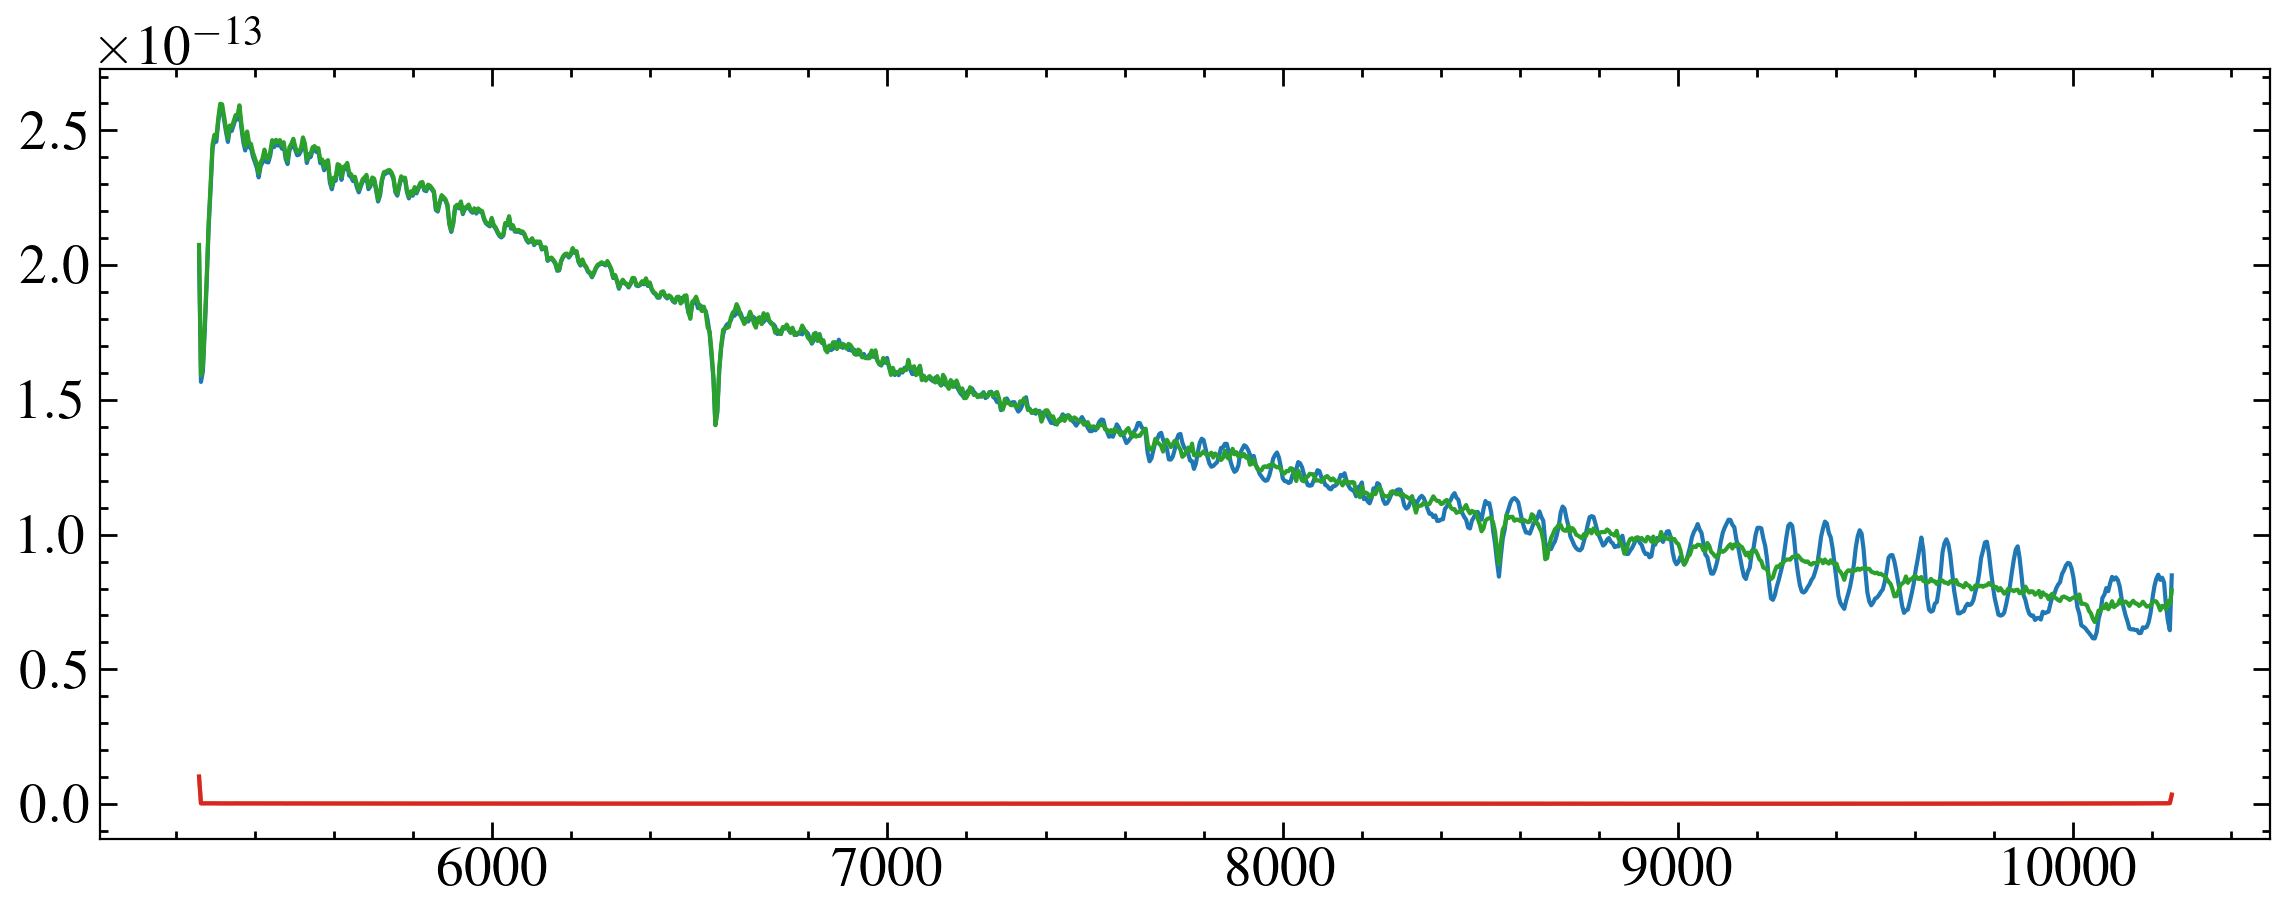

In [98]:


for i, x in enumerate(g750ls):
    hdr = fits.getheader(x, 0)
    root = hdr['ROOTNAME']
    flat = hdr['FRNGFLAT']
    print(hdr['ROOTNAME'], hdr['FRNGFLAT'])
    flatpath = '{}{}'.format(path, flat.lower())
    scipath = '{}{}'.format(path, root)
    stistools.defringe.normspflat('{}_raw.fits'.format(flatpath),
                              '{}_nsp.fits'.format(flatpath), do_cal=True,
                              wavecal='{}_wav.fits'.format(scipath))
    with fits.open('{}_nsp.fits'.format(flatpath), mode='update') as hdulist:
        hdulist[1].data[:,:250] = 1
    mode = fits.getheader('{}_raw.fits'.format(scipath),0)['OPT_ELEM']
    if mode == "G750L":
        prod_type = "crj"
    elif mode == "G750M":
        prod_type = "sx2"
        
    if os.path.exists('{}_frr.fits'.format(flatpath)):
        os.remove('{}_frr.fits'.format(flatpath))

    stistools.defringe.mkfringeflat('{}_{}.fits'.format(scipath, prod_type), '{}_nsp.fits'.format(flatpath),
                                    '{}_frr.fits'.format(flatpath), beg_shift=-0.5, end_shift=2, shift_step=0.1,
                                    beg_scale=0.8, end_scale=1.7, scale_step=0.04)
    
    stistools.defringe.defringe('{}_{}.fits'.format(scipath, prod_type), '{}_frr.fits'.format(flatpath), overwrite=True)
    
    outpath = '{}defringed/'.format(path)
    outname = '{}{}_defringed_x1d.fits'.format(outpath, root)
         
    if os.path.exists(outname):
        os.remove(outname)
    
    drj = '{}_drj.fits'.format(scipath)
    trl = '{}{}.trl'.format(outpath, root)
    stistools.x1d.x1d(drj, output = outname, trailer=trl)
    
    fig, ax = plt.subplots()
    olddata = fits.getdata(x, 1)[0]
    w0, f0 , e0 = olddata['WAVELENGTH'], olddata['FLUX'], olddata['ERROR']
    
    newdata = fits.getdata(outname, 1)[0]
    w1, f1 , e1 = newdata['WAVELENGTH'], newdata['FLUX'], newdata['ERROR']
    
    plt.plot(w0, f0)
    plt.plot(w0, e0)
    plt.plot(w1, f1)
    plt.plot(w1, e1)
    plt.show()
    
    


TypeError: normspflat() missing 1 required positional argument: 'inflat'